In [ ]:
# Acceso a folder de Google Drive para los archivos CSV

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importación de datasets:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mstats

# Obtencion de csv dataus2024
%cd "/content/drive/MyDrive/7ptimo Sem/ProyectoBloque1Statistics"
data = pd.read_csv("dataus2024.csv")
data.shape
data.head()

/content/drive/MyDrive/7ptimo Sem/ProyectoBloque1Statistics


,firm,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,...,currentliabilities,longdebt,adjprice,originalprice,sharesoutstanding,year,fixedassets,yearf,cto,fiscalq
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,62.879221,104.0000,452000.000,2000,NaN,NaN,1,NaN
1,A,2000q2,6.0,4731000.0,2421000.0,1925000.0,73000.0,0.0,0.0,161000.0,...,2186000.0,0.0,44.589833,73.7500,452271.967,2000,1453000.0,2000.0,2,2.0
2,A,2000q3,9.0,7401000.0,3790000.0,3016000.0,101000.0,0.0,0.0,244000.0,...,2510000.0,0.0,29.587999,48.9375,453014.579,2000,1581000.0,2000.0,3,3.0
3,A,2000q4,12.0,10773000.0,5522000.0,4198000.0,111000.0,0.0,0.0,407000.0,...,2758000.0,0.0,33.102282,54.7500,456366.381,2000,1741000.0,2000.0,4,4.0
4,A,2001q1,3.0,2841000.0,1449000.0,1113000.0,19000.0,-25000.0,0.0,119000.0,...,3070000.0,0.0,18.579600,30.7300,456769.737,2001,1821000.0,2001.0,1,1.0


In [ ]:
# Obtención de csv firmsus
firms = pd.read_csv("firmsus2024.csv")
firms.shape
firms.head()

,empresa,Nombre,status,partind,naics1,naics2,SectorEconomatica
0,A,"Agilent Technologies, Inc",activo,0.09,Industrias manufactureras,"Fabricación de instrumentos de medición, contr...",Electroelectronic
1,AA,Alcoa Corp,activo,NaN,Industrias manufactureras,Industria básica del aluminio,Siderur & Metalur
2,AABA_old,Altaba Inc,cancelado,NaN,"Servicios profesionales, científicos y técnicos",Servicios de diseño de sistemas de cómputo y s...,Software y Datos
3,AAC_old,Aac Hldg Inc,cancelado,NaN,Servicios de salud y de asistencia social,Otros consultorios para el cuidado de la salud,Otros
4,AAIC_old,Arlington Asset Investment Corp,cancelado,NaN,Servicios financieros y de seguros,Otros fondos,Fondos


In [ ]:
# Hacer un merge / concat de data con firms para jalar las columnas de la industria, nombre de la empresa en data:
# Me quedo con las columnas que necesito: company code, company name, status and industry:
firms1 = firms[['empresa', 'Nombre', 'status', 'naics1']]
firms1.columns = ['firm', 'Empresa', 'status', 'industria']

# Hago un Left JOIN usando el panel de data como headset:
data = pd.merge(data, firms1, on='firm', how='left')
data.head()


,firm,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,...,originalprice,sharesoutstanding,year,fixedassets,yearf,cto,fiscalq,Empresa,status,industria
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,104.0000,452000.000,2000,NaN,NaN,1,NaN,"Agilent Technologies, Inc",activo,Industrias manufactureras
1,A,2000q2,6.0,4731000.0,2421000.0,1925000.0,73000.0,0.0,0.0,161000.0,...,73.7500,452271.967,2000,1453000.0,2000.0,2,2.0,"Agilent Technologies, Inc",activo,Industrias manufactureras
2,A,2000q3,9.0,7401000.0,3790000.0,3016000.0,101000.0,0.0,0.0,244000.0,...,48.9375,453014.579,2000,1581000.0,2000.0,3,3.0,"Agilent Technologies, Inc",activo,Industrias manufactureras
3,A,2000q4,12.0,10773000.0,5522000.0,4198000.0,111000.0,0.0,0.0,407000.0,...,54.7500,456366.381,2000,1741000.0,2000.0,4,4.0,"Agilent Technologies, Inc",activo,Industrias manufactureras
4,A,2001q1,3.0,2841000.0,1449000.0,1113000.0,19000.0,-25000.0,0.0,119000.0,...,30.7300,456769.737,2001,1821000.0,2001.0,1,1.0,"Agilent Technologies, Inc",activo,Industrias manufactureras


Utilidad operativa antes de impuesto = EBIT = Earnings Before Interest and Taxes

Utilidad bruta =  GROSS PROFIT = Revenue - COGS

COGS = Cost of Good Sold; son los gastos VARIABLES: Cambian con las ventas

EBIT = GROSS PROFIT - SGAE

NET INCOME = EBIT - FINEXP - INCOMETAX + OTHERINCOME + EXTRAORDINARY ITEMS

In [ ]:
# Calcular la columna de NetIncome y otras asociadas:

data['GROSSPROFIT'] = data['revenue'] - data['cogs']
data['EBIT'] = data['GROSSPROFIT'] - data['sgae']
data['NETINCOME'] = data['EBIT'] - data['finexp'] - data['incometax'] + data['otherincome'] + data['extraordinaryitems']
data['EBT'] = data['EBIT'] - data['finexp'] + data['otherincome'] + data['extraordinaryitems']

data.head()

,firm,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,...,yearf,cto,fiscalq,Empresa,status,industria,GROSSPROFIT,EBIT,NETINCOME,EBT
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,NaN,"Agilent Technologies, Inc",activo,Industrias manufactureras,NaN,NaN,NaN,NaN
1,A,2000q2,6.0,4731000.0,2421000.0,1925000.0,73000.0,0.0,0.0,161000.0,...,2000.0,2,2.0,"Agilent Technologies, Inc",activo,Industrias manufactureras,2310000.0,385000.0,297000.0,458000.0
2,A,2000q3,9.0,7401000.0,3790000.0,3016000.0,101000.0,0.0,0.0,244000.0,...,2000.0,3,3.0,"Agilent Technologies, Inc",activo,Industrias manufactureras,3611000.0,595000.0,452000.0,696000.0
3,A,2000q4,12.0,10773000.0,5522000.0,4198000.0,111000.0,0.0,0.0,407000.0,...,2000.0,4,4.0,"Agilent Technologies, Inc",activo,Industrias manufactureras,5251000.0,1053000.0,757000.0,1164000.0
4,A,2001q1,3.0,2841000.0,1449000.0,1113000.0,19000.0,-25000.0,0.0,119000.0,...,2001.0,1,1.0,"Agilent Technologies, Inc",activo,Industrias manufactureras,1392000.0,279000.0,154000.0,273000.0


Calcular Valor del Mercado y Valor en Libros

Valor del Mercado = MARKET VALUE = originalprice * sharesoutstanding
originalprice = precio original de la acccion
sharesoutstanding = # de acciones disponibles

Valor en Libros = BOOK VALUE = totalassets - totalliabilities
totalassets = total de activos (reursos)
totalliabilities = total de PASIVOS

In [ ]:
data['BOOKVALUE'] = data['totalassets'] - data['totalliabilities']
data['MARKETVALUE'] = data['originalprice'] * data['sharesoutstanding']

#Variable de control
# Book to market ratio
data['BOOKTOMARKET'] = data['BOOKVALUE'] / data['MARKETVALUE']

data.head()

,firm,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,...,Empresa,status,industria,GROSSPROFIT,EBIT,NETINCOME,EBT,BOOKVALUE,MARKETVALUE,BOOKTOMARKET
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Agilent Technologies, Inc",activo,Industrias manufactureras,NaN,NaN,NaN,NaN,NaN,4.700800e+07,NaN
1,A,2000q2,6.0,4731000.0,2421000.0,1925000.0,73000.0,0.0,0.0,161000.0,...,"Agilent Technologies, Inc",activo,Industrias manufactureras,2310000.0,385000.0,297000.0,458000.0,4642000.0,3.335506e+07,0.139169
2,A,2000q3,9.0,7401000.0,3790000.0,3016000.0,101000.0,0.0,0.0,244000.0,...,"Agilent Technologies, Inc",activo,Industrias manufactureras,3611000.0,595000.0,452000.0,696000.0,4902000.0,2.216940e+07,0.221116
3,A,2000q4,12.0,10773000.0,5522000.0,4198000.0,111000.0,0.0,0.0,407000.0,...,"Agilent Technologies, Inc",activo,Industrias manufactureras,5251000.0,1053000.0,757000.0,1164000.0,5265000.0,2.498606e+07,0.210718
4,A,2001q1,3.0,2841000.0,1449000.0,1113000.0,19000.0,-25000.0,0.0,119000.0,...,"Agilent Technologies, Inc",activo,Industrias manufactureras,1392000.0,279000.0,154000.0,273000.0,5541000.0,1.403653e+07,0.394756


El Book to Market ratio es una variable de "control" que vamos a incluír en el modelo de regresión

En estadística, se le llama variable de control a aquellas variables independientes (explicativas) que en la disciplina de estudio se ha encontrado que tiene mucha correlación con la variable dependiente.

Generamos la variable / ratio de earnings per share deflated by price, que será otra variable de control:

Que es earnings per share deflated by price?
Qúe es earnings per share?

Earnings se puede medir con alguna variable de utilidad, ejemplo:
* NETINCOME
* EBIT (UTILIDAD OPERATIVA)

EARNINGS PER SHARE = EPS = EARNINGS / sharesoutstanding

EARNINGS PER SHARE DEFLATED BY PRICE = EPSP = EPS / originalprice


In [ ]:
data['EPS'] = data['NETINCOME'] / data['sharesoutstanding']

# Earning per share divided by price
data['EPSP'] = data['EPS'] / data['originalprice']

data.head()

,firm,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,...,industria,GROSSPROFIT,EBIT,NETINCOME,EBT,BOOKVALUE,MARKETVALUE,BOOKTOMARKET,EPS,EPSP
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Industrias manufactureras,NaN,NaN,NaN,NaN,NaN,4.700800e+07,NaN,NaN,NaN
1,A,2000q2,6.0,4731000.0,2421000.0,1925000.0,73000.0,0.0,0.0,161000.0,...,Industrias manufactureras,2310000.0,385000.0,297000.0,458000.0,4642000.0,3.335506e+07,0.139169,0.656685,0.008904
2,A,2000q3,9.0,7401000.0,3790000.0,3016000.0,101000.0,0.0,0.0,244000.0,...,Industrias manufactureras,3611000.0,595000.0,452000.0,696000.0,4902000.0,2.216940e+07,0.221116,0.997760,0.020388
3,A,2000q4,12.0,10773000.0,5522000.0,4198000.0,111000.0,0.0,0.0,407000.0,...,Industrias manufactureras,5251000.0,1053000.0,757000.0,1164000.0,5265000.0,2.498606e+07,0.210718,1.658755,0.030297
4,A,2001q1,3.0,2841000.0,1449000.0,1113000.0,19000.0,-25000.0,0.0,119000.0,...,Industrias manufactureras,1392000.0,279000.0,154000.0,273000.0,5541000.0,1.403653e+07,0.394756,0.337150,0.010971


# 1.1 Calculation of financial variables and ratios


Ahora calculamos los retornos de acción (trimestrales y anuales)

Retornos simples
retorno trimestral = QR = adjprice / adjprice(t-1) - 1
retorno anual = YR = adjprice / adjprice(t-4) - 1

Retornos Continuos Compuestos:
ret trimestral = qr = log(adjprice) - log(adjprice(t-1)) = log(adjprice / adjprice(t-1))
ret anual = yr = log(adjprice) - log(adjprice(t-4))

Es importante agrupar por firm usando el 'groupby'

In [ ]:
# Retornos simples
data['QR'] = data['adjprice'] / data['adjprice'].shift(1) - 1
data['YR'] = data['adjprice'] / data['adjprice'].shift(4) - 1

# Retornos continuos compuestos, agrupados por firm (contemporary continuous returns)
data['qr'] = np.log(data['adjprice']) - np.log(data.groupby(['firm'])['adjprice'].shift(1))
data['yr'] = np.log(data['adjprice']) - np.log(data.groupby(['firm'])['adjprice'].shift(4))

# Future annual stock cc return (one-quarter ahead)
data['future_yr'] = np.log(data.groupby(['firm'])['adjprice'].shift(-1)) - np.log(data.groupby(['firm'])['adjprice'].shift(3))
data['fy']= data.groupby(['firm'])['yr'].shift(-1)

# Confirmamos que se haya hecho de manera correcta
data[['firm', 'q', 'yr', 'future_yr', 'fy']].head(20)


,firm,q,yr,future_yr,fy
0,A,2000q1,NaN,NaN,NaN
1,A,2000q2,NaN,NaN,NaN
2,A,2000q3,NaN,NaN,NaN
3,A,2000q4,NaN,-1.219152,-1.219152
4,A,2001q1,-1.219152,-0.819441,-0.819441
5,A,2001q2,-0.819441,-0.917569,-0.917569
6,A,2001q3,-0.917569,-0.652522,-0.652522
7,A,2001q4,-0.652522,0.128965,0.128965
8,A,2002q1,0.128965,-0.317877,-0.317877
9,A,2002q2,-0.317877,-0.403421,-0.403421


In [ ]:
# Identify most recent quarter
most_recent_quarter = data.loc[data['yearf'] + data['fiscalq'] / 10.0 == (data['yearf'] + data['fiscalq'] / 10.0).max()]

most_recent_quarter.head()

,firm,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,...,MARKETVALUE,BOOKTOMARKET,EPS,EPSP,QR,YR,qr,yr,future_yr,fy
10776,AEHR,2024q2,12.0,66218.0,33675.0,22465.000,-8.0,0.000000e+00,-2388.000,-20698.0,...,3.229775e+05,0.345513,1.146682,0.102657,-0.099194,-0.729212,-0.104465,-1.306419,NaN,NaN
16264,AI,2024q2,12.0,310582.0,132022.0,496902.000,-641.0,0.000000e+00,-40079.000,792.0,...,3.614723e+06,0.241610,-2.240835,-0.077377,0.069819,-0.205051,0.067489,-0.229477,NaN,NaN
17342,AIR,2024q2,12.0,2318900.0,1876600.0,313100.000,-29900.0,0.000000e+00,41000.000,12000.0,...,2.596195e+06,0.458286,1.296517,0.017834,0.214298,0.258657,0.194166,0.230045,NaN,NaN
24496,ALZN,2024q2,12.0,0.0,0.0,9937.645,0.0,1.818989e-12,10.101,0.0,...,2.708284e+03,-0.957870,-1.448663,-3.673081,-0.605600,-0.948444,-0.930390,-2.965095,NaN,NaN
28416,AMSWA,2024q2,12.0,102515.0,36093.0,62314.000,3655.0,1.679000e+03,-3820.000,1889.0,...,3.038519e+05,0.429423,0.341731,0.037429,-0.193796,-0.095365,-0.215418,-0.100224,NaN,NaN


# Financial ratios to predict future stock return

1. Net Profit Margin

  Mide el porcentaje de ingresos que se convierte en ganancia neta.

  net profit margin = NPM = NETINCOME / revenue

In [ ]:
data['NPM'] = data['NETINCOME'] / data['revenue']


2. Effective Interest Rate

  Mide la tasa de interés efectiva sobre los pasivos financieros.

  Effective Interest Rate = EIR = finexp / totalliabilities

In [ ]:
data['EIR'] = data['finexp'] / data['totalliabilities']

3. Interest Burden
 Mide la proporción del EBIT que queda despues de deducir los gastos de intereses.

 Interest Burden = IB = EBT / EBIT

In [ ]:
data['IB'] = data['EBT'] / data['EBIT']

4. Effective Tax Rate

 Mide el porcentaje de ingresos antes de impuestos que se paga en impuestos.

 Effective Tax Rate = incometax / EBT

In [ ]:
data['ETR'] = data['incometax'] / data['EBT']

# 1.2 Firm Composition of the US financial market


* Show how many active firms by industry there are in the sample



In [ ]:
data.columns

Index(['firm', 'q', 'fiscalmonth', 'revenue', 'cogs', 'sgae', 'otherincome',
       'extraordinaryitems', 'finexp', 'incometax', 'totalassets',
       'currentassets', 'inventory', 'totalliabilities', 'currentliabilities',
       'longdebt', 'adjprice', 'originalprice', 'sharesoutstanding', 'year',
       'fixedassets', 'yearf', 'cto', 'fiscalq', 'Empresa', 'status',
       'industria', 'GROSSPROFIT', 'EBIT', 'NETINCOME', 'EBT', 'BOOKVALUE',
       'MARKETVALUE', 'BOOKTOMARKET', 'EPS', 'EPSP', 'QR', 'YR', 'qr', 'yr',
       'future_yr', 'fy', 'NPM', 'EIR', 'ETR'],
      dtype='object')

In [ ]:
# Show how many active firms by industry there are in the sample
recent_active_firms = data[(data['q'] == '2024q2') & (data['status'] == 'activo')]

active_firms_by_industry = recent_active_firms.groupby('industria')['Empresa'].nunique().reset_index()

# Renombrar columnas para mayor claridad
active_firms_by_industry.columns = ['Industria', 'Número de Empresas Activas']

# Mostrar las empresas activas por industria
print("Número de empresas activas por industria en 2024q2:")
print(active_firms_by_industry)

Número de empresas activas por industria en 2024q2:
                                            Industria  \
0                                                   -   
1   Agricultura, ganadería, aprovechamiento forest...   
2                               Comercio al por mayor   
3                               Comercio al por menor   
4                                        Construcción   
5                Empresas de electricidad, gas y agua   
6                           Industrias manufactureras   
7                       Información en medios masivos   
8   Minería, explotación de canteras y extracción ...   
9   Otros servicios excepto actividades gubernamen...   
10  Servicios de alojamiento temporal y de prepara...   
11  Servicios de apoyo a los negocios y manejo de ...   
12  Servicios de esparcimiento culturales y deport...   
13          Servicios de salud y de asistencia social   
14                               Servicios educativos   
15                 Servicios financi

In [ ]:
# Show table with book value and market value statistics
# Agrupar por industria y calcular estadísticas descriptivas
stats_by_industry = data[(data['q'] == '2024q2') & (data['status'] == 'activo')] \
    .groupby('industria')[['BOOKVALUE', 'MARKETVALUE']].describe()
# Mostrar las estadísticas descriptivas
stats_by_industry

BOOKVALUE                \
                                                       count          mean   
industria                                                                    
-                                                        0.0           NaN   
Agricultura, ganadería, aprovechamiento foresta...      10.0  4.841963e+06   
Comercio al por mayor                                   36.0  1.874937e+06   
Comercio al por menor                                   88.0  5.621523e+06   
Construcción                                            32.0  3.871633e+06   
Empresas de electricidad, gas y agua                    40.0  1.107363e+07   
Industrias manufactureras                              476.0  5.411659e+06   
Información en medios masivos                          103.0  8.747282e+06   
Minería, explotación de canteras y extracción d...      41.0  5.334215e+06   
Otros servicios excepto actividades gubernament...       8.0  6.077645e+05   
Servicios de alojamiento temporal y de preparac...      28.0  6.144859e+05   
Servicios de apoyo a los negocios y manejo de r...      56.0  3.929410e+06   
Servicios de esparcimiento culturales y deporti...       4.0  1.317850e+06   
Servicios de salud y de asistencia social               18.0  2.122692e+06   
Servicios educativos                                     5.0  1.548241e+06   
Servicios financieros y de seguros                     270.0  1.006902e+07   
Servicios inmobiliarios y de alquiler de bienes...      23.0  3.420743e+06   
Servicios profesionales, científicos y técnicos         51.0  1.047573e+07   
Transportes, correos y almacenamiento                   34.0  5.583857e+06   

                                                                  \
                                                             std   
industria                                                          
-                                                            NaN   
Agricultura, ganadería, aprovechamiento foresta...  7.755614e+06   
Comercio al por mayor                               2.385643e+06   
Comercio al por menor                               2.684032e+07   
Construcción                                        6.320282e+06   
Empresas de electricidad, gas y agua                1.209971e+07   
Industrias manufactureras                           1.255505e+07   
Información en medios masivos                       3.199285e+07   
Minería, explotación de canteras y extracción d...  7.348217e+06   
Otros servicios excepto actividades gubernament...  9.673748e+05   
Servicios de alojamiento temporal y de preparac...  2.348038e+06   
Servicios de apoyo a los negocios y manejo de r...  8.233039e+06   
Servicios de esparcimiento culturales y deporti...  7.685955e+05   
Servicios de salud y de asistencia social           2.325420e+06   
Servicios educativos                                1.458289e+06   
Servicios financieros y de seguros                  3.327642e+07   
Servicios inmobiliarios y de alquiler de bienes...  5.069612e+06   
Servicios profesionales, científicos y técnicos     4.687608e+07   
Transportes, correos y almacenamiento               7.581202e+06   

                                                                  \
                                                             min   
industria                                                          
-                                                            NaN   
Agricultura, ganadería, aprovechamiento foresta...  1.889520e+05   
Comercio al por mayor                              -3.891125e+06   
Comercio al por menor                              -1.460600e+07   
Construcción                                        1.110630e+05   
Empresas de electricidad, gas y agua                0.000000e+00   
Industrias manufactureras                          -1.798200e+07   
Información en medios masivos                      -2.113000e+06   
Minería, explotación de canteras y extracción d...  9.745008e+03   
Otros servicios excep

**What can you say about the typical firm size in terms of market value and book value? How much these variables change within each industry? How firm size (in market value) is distributed? You have to do the
 right descriptive statistics ***

* LA MEDIA DEL VALOR CONTABLE VARÍA SIGNIFICATIVAMENTE ENTRE LAS INDUSTRIAS. PODEMOS OBSERVAR COMO EN EL SECTOR DE "INDUSTRIAS MANUFACTURERAS" , LA MEDIA DEL VALOR CONTABLE (BOOKVALUE) ES DE APROXIMADAMENTE 2.47 MILLONES, MIENTRAS QUE EN "SERVICIOS DE ALOJAMIENTO TEMPORAL Y DE PREPARACIÓN DE ALIMENTOS Y BEBIDAS", ES DE APROXIMADAMENTE 9.70 MILLONES.

* COMPARANDO LA MEDIA Y MEDIANA, NOTAMOS EN VARIAS INDUSTRIAS UNA MEDIA BASTANTE MAYOR QUE LA MEDIANA, LO QUE INDICA QUE ALGUNAS FIRMAS TIENEN VALORES CONTABLES MUY ALTOS, SESGANDO LA MEDIA HACIA ARRIBA.

* TOMANDO EN CUENTA LA DESVIACIÓN ESTÁNDAR DENTRO DE CADA INDUSTRIA, EXISTEN ALGUNAS EN LAS QUE SE ENCUENTRA UN VALOR MUY ALTO, COMO LA EL SECTOR DE "INDUSTRIAS MANUFACTURERAS" CON UN VALOR DE 9.60 MILLONES, INDICANDO QUE TIENE FIRMAS CON UNA VARIACIÓN AMPLIA EN TÉRMINOS DE VALOR CONTABLE (BOOKVALUE).

* LOS RANGOS INTERCUARTÍLICOS (25% A 75%) MUESTRAN LA DISTRIBUCIÓN DE LOS VALORES CONTABLES. PODEMOS OBSERVAR EN VARIAS INDUSTRIAS UN 25% DE LAS FIRMAS QUE TIENEN VALORES MENORES QUE EL 75%, INDICANDO UNA DISTRIBUCIÓN SESGADA.

* LA MEDIA DEL VALOR DEL MERCADO TAMBIÉN VARIA MUCHO ENTRE LAS INDUSTRIAS. EN VARIAS DE LAS MISMAS, LA MEDIA DEL VALOR DEL MERCADO ES MAYOR QUE LA MEDIANA, LO QUE INDICA QUE DENTRO DE ALGUNAS INDUSTRIAS EXISTEN FIRMAS CON VALORES DE MERCADO EXTREMADAMENTE ALTOS QUE ELEVAN LA MEDIA.

* LA DISTRIBUCIÓN DEL TAMAÑO DE LAS FIRMAS EN TÉRMINOS DE VALOR DEL MERCADO ME INDICA QUE EN VARIAS FIRMAS, LA MEDIANA ES SIGNIFICATIVAMENTE MENOR QUE LA MEDIA, LO QUE MUESTRA UNA DISTRIBUCIÓN SESGADA A LA DERECHA, CON ALGUNOS VALORES DE FIRMAS MUY GRANDES QUE INFLUYEN EN EL VALOR DE LA MEDIA.

* EXISTEN VALORES EXTREMOS QUE INDICAN UN DOMINIO DEL VALOR DEL MERCADO POR PARTE DE ALGUNAS FIRMAS, CREANDO UNA DISTRIBUCIÓN DONDE LA MAYORÍA DE FIRMAS SON CIERTAMENTE PEQUEÑAS EN COMPARACIÓN CON AQUELLAS DE VALOR DE MERCADO ALTO.

**Which are the biggest 10 US firms in terms of market value and how far they are from the typical market size of a US firm?**



In [ ]:
# Agrupar por firma y obtener el valor máximo del mercado para cada firma
max_market_value_by_firm = data.groupby('firm')['MARKETVALUE'].max().reset_index()

# Ordenar por valor del mercado y seleccionar las 10 firmas mas grandes
top_10_firms = max_market_value_by_firm.nlargest(10, 'MARKETVALUE')



# Mostrar las 10 firmas mas grandes
print("Las 10 firmas con el mayor valor del mercado son:")
top_10_firms

Las 10 firmas con el mayor valor del mercado son:


,firm,MARKETVALUE
3375,MSFT,3.321869e+09
11,AAPL,3.229664e+09
3614,NVDA,3.039084e+09
4203,RCM,2.256959e+09
2210,GOOGL,2.251010e+09
299,AMZN,2.011081e+09
3216,META,1.278971e+09
5107,TSLA,1.113708e+09
2995,LLY,8.604780e+08
504,AVGO,7.473555e+08


In [ ]:
# Sacar la media del market value
mean_market_value = data['MARKETVALUE'].mean()

# Mostrar la media del market value
print("La media del valor del mercado es:", mean_market_value)

# Obtener la distancia de la media
top_10_firms['distance_from_mean'] = top_10_firms['MARKETVALUE'] - mean_market_value

# Mostrar el DataFrame con la nueva columna
top_10_firms

La media del valor del mercado es: 8829190.789774483


,firm,MARKETVALUE,distance_from_mean
3375,MSFT,3.321869e+09,3.313040e+09
11,AAPL,3.229664e+09,3.220835e+09
3614,NVDA,3.039084e+09,3.030255e+09
4203,RCM,2.256959e+09,2.248130e+09
2210,GOOGL,2.251010e+09,2.242181e+09
299,AMZN,2.011081e+09,2.002252e+09
3216,META,1.278971e+09,1.270142e+09
5107,TSLA,1.113708e+09,1.104879e+09
2995,LLY,8.604780e+08,8.516488e+08
504,AVGO,7.473555e+08,7.385264e+08


* TODAS ESTAS FIRMAS TIENEN VALORES DE MERCADO SIGNIFICATIVAMENTE SUPERIORES A LA MEDIA, SON FIRMAS MÁS GRANDES QUE EL VALOR TÍPICO. LA DISTANCIA DE LOS VALORES VARÍA APROXIMADAMENTE DE $0.74 MIL MILLONES HASTA MÁS DE 3.32 MIL MILLONES.

LAS FIRMAS MÁS GRANDES TIENEN UNA GRAN CANTIDAD DE VALOR DE MERCADO CONCENTRADO EN COMPARACIÓN CON OTRAS FIRMAS. ESTAS TIENEN UNA MAYOR RELEVANCIA Y PESO EN LA ECONOMÍA DE EE.UU.

**Which are the biggest 10 US firms in terms of book value and how far they are from the typical book size of a US firm?**



In [ ]:
# Sacar la media de book value
mean_book_value = data['BOOKVALUE'].mean()

# Mostrar la media de book value
print("La media del valor en libros es:", mean_book_value)

# Agrupar por firma y obtener el valor máximo de libros para cada firma
max_book_value_by_firm = data.groupby('firm')['BOOKVALUE'].max().reset_index()

# Ordenar por valor de libros y seleccionar las 10 firmas mas grandes
top_10_firms_book = max_book_value_by_firm.nlargest(10, 'BOOKVALUE')

# Obtener la distancia de la media
top_10_firms_book['distance_from_mean'] = top_10_firms_book['BOOKVALUE'] - mean_book_value


# Mostrar las 10 firmas mas grandes
print("Las 10 firmas con el mayor valor de libros son:")
top_10_firms_book

La media del valor en libros es: 3036892.4755370854
Las 10 firmas con el mayor valor de libros son:


,firm,BOOKVALUE,distance_from_mean
775,BRK_B,571490000.0,5.684531e+08
2770,JPM,340552000.0,3.375151e+08
2210,GOOGL,300753000.0,2.977161e+08
566,BAC,293892000.0,2.908551e+08
3375,MSFT,268477000.0,2.654401e+08
299,AMZN,236447000.0,2.334101e+08
846,C,232690000.0,2.296531e+08
5611,XOM,213052000.0,2.100151e+08
5477,WFC,208079000.0,2.050421e+08
4878,T,201934000.0,1.988971e+08


* ESTAS FIRMAS TIENEN VALORES CONTABLES SUPERIORES A LA MEDIA, CON UNA DIFERENCIA DE LA MEDIA QUE VARÍA DESDE LOS $1.99 MIL MILLONES HASTA MÁS DE 5.68 MILLONES.
* LAS FIRMAS CON EL VALOR CONTABLE MÁS ALTO DOMINAN EN ESTOS MISMOS TÉRMINOS, REFLEJANDO SU TAMAÑO Y POSICIÓN EN LA ECONOMÍA ESTADOUNIDENSE.

# 1.3 Evolution of the US financial market

Considering the whole history of financial data for all firms, and only annual fiscal information (selecting fiscalmonth=12) :

1. How the total market value of the US market has changed over the years? Do a table and/or graph and explain

In [ ]:
# Filtrar solo los datos anuales (fiscalmonth = 12)
annual_data = data[data['fiscalmonth'] == 12]

# Calcular el valor total del mercado para cada año
total_market_value_by_year = annual_data.groupby('yearf')['MARKETVALUE'].sum().reset_index()

#Filtrar para que llegue solo hasta el 2023
total_market_value_by_year = total_market_value_by_year[total_market_value_by_year['yearf'] <= 2023]

# Mostrar la tabla
total_market_value_by_year

,yearf,MARKETVALUE
0,1999.0,2.120570e+08
1,2000.0,1.330257e+10
2,2001.0,1.152204e+10
3,2002.0,9.155828e+09
4,2003.0,1.182696e+10
5,2004.0,1.309294e+10
6,2005.0,1.370635e+10
7,2006.0,1.528800e+10
8,2007.0,1.574501e+10
9,2008.0,1.001692e+10


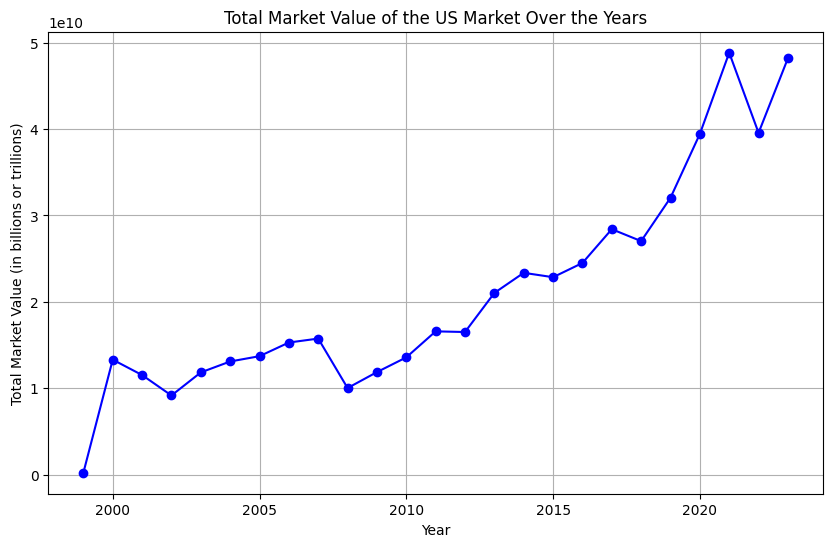

In [ ]:
# Renombrar columnas para mayor claridad
total_market_value_by_year.columns = ['Fiscal Year', 'Total Market Value']

# Crear graficos de linea para mostrar los cambios en el valor total de mercado a lo largo de los años
plt.figure(figsize=(10, 6))
plt.plot(total_market_value_by_year['Fiscal Year'], total_market_value_by_year['Total Market Value'], marker='o', linestyle='-', color='b')
plt.title('Total Market Value of the US Market Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Market Value (in billions or trillions)')
plt.grid(True)
plt.show()

EL GRÁFICO DEMUESTRA COMO HA EVOLUCIONADO EL VALOR TOTAL DE MERCADO DEL MERCADO ESTADOUNIDENSE DESDE EL AÑO 2000 HASTA EL 2024.
EL VALOR DE MERCADO COMIENZA ALREDEDOR DE $12.7 MIL MILLONES EN EL AÑO 200 , PERO MUESTRA UNA TENDENCIA BAJA, ALCANZANDO UN MINIMO DE 9.4 MIL MILLONES EN EL 2002.

A PARTIR DE 2003, EL VALOR DEL MERCADO COMENZO A RECUPERARSE, MOSTRANDO UN CRECIMIENTO AÑO CON AÑO. ESTO COINCIDE CON UNA RECUPERACION Y CRECIMIENTO ECONÓMICO ANTES DE LA CRISIS FINANCIERA.

SE OBSERVA UNA CAIDA SIGNIFICATIVA EN 2008, DONDE EL VALOR DE MERCADO DISMINUYE BASTANTE. DESPUES DE LA CRISIS, EL VALOR DE MERCADO SE RECUPERA A PARTIR DE 2009, CON UNA TENDENCIA ASCENDENTE CONSTANTE DURANTE LA DÉCADA DE 2010. PARA 2019, LLEGA A LOS 32.1 MIL MILLONES, REFLEJANDO UN MERCADO EN CRECIMIENTO MÁS ALTO EN LA HISTORIA.

A PARTIR DEL 2020 SE TUVO UN AUMENTO PRONUNCIADO, ESTO PUEDE ATRIBUIRSE A LA PANDEMIA DE COVID-19 Y LAS MEDIDAS MONETARIAS IMPLEMENTADAS.




2. **How total revenue and total net income of all US firms has changed over the years? Do a table and/or graph and explain**


In [ ]:
# Calcular los ingresos totales y el ingreso neto total por año
financials_by_year = annual_data.groupby('year').agg({'revenue': 'sum', 'NETINCOME': 'sum'}).reset_index()

# Filtrar para mostrar hasta el año 2023
financials_by_year = financials_by_year[financials_by_year['year'] <= 2023]

# Renombrar las columnas para mayor claridad
financials_by_year.columns = ['Year', 'Total Revenue', 'Total Net Income']


    Year  Total Revenue  Total Net Income
0   2000   6.656273e+09      3.448785e+08
1   2001   7.758654e+09      6.754650e+07
2   2002   7.575908e+09     -5.642922e+07
3   2003   8.213610e+09      3.645524e+08
4   2004   9.097849e+09      4.312209e+08
5   2005   9.971419e+09      5.229196e+08
6   2006   1.093114e+10      6.574464e+08
7   2007   1.159291e+10      6.098692e+08
8   2008   1.175305e+10      3.470076e+08
9   2009   1.075167e+10      5.619683e+08
10  2010   1.168569e+10      7.039269e+08
11  2011   1.354407e+10      8.276489e+08
12  2012   1.405378e+10      7.691981e+08
13  2013   1.441442e+10      9.085672e+08
14  2014   1.493200e+10      8.900909e+08
15  2015   1.445078e+10      6.479261e+08
16  2016   1.437061e+10      7.702418e+08
17  2017   1.522750e+10      9.333179e+08
18  2018   1.616276e+10      1.024211e+09
19  2019   1.676664e+10      9.576354e+08
20  2020   1.602479e+10      5.592280e+08
21  2021   1.860827e+10      1.495393e+09
22  2022   2.107170e+10      1.488

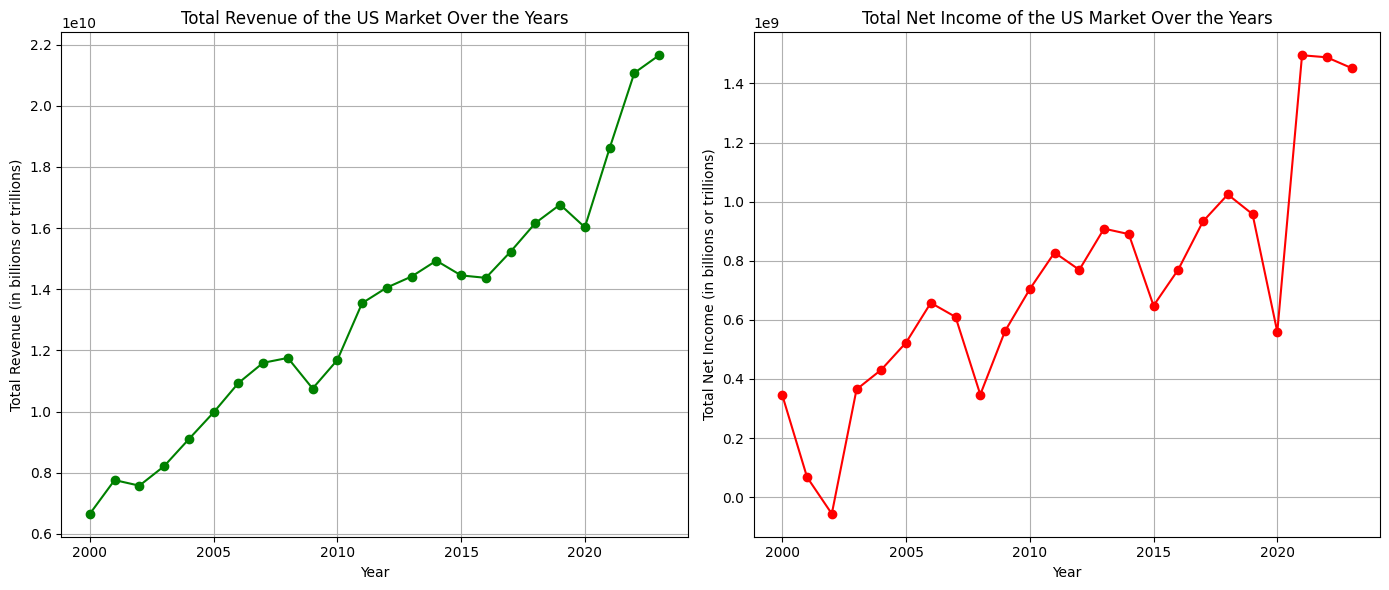

In [ ]:

# Mostrar la tabla con los ingresos totales y el ingreso neto total por año
print(financials_by_year)

# Crear gráficos de línea para mostrar los cambios en los ingresos totales y el ingreso neto total
plt.figure(figsize=(14, 6))

# Gráfico de ingresos totales
plt.subplot(1, 2, 1)
plt.plot(financials_by_year['Year'], financials_by_year['Total Revenue'], marker='o', linestyle='-', color='g')
plt.title('Total Revenue of the US Market Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Revenue (in billions or trillions)')
plt.grid(True)

# Gráfico de ingreso neto total
plt.subplot(1, 2, 2)
plt.plot(financials_by_year['Year'], financials_by_year['Total Net Income'], marker='o', linestyle='-', color='r')
plt.title('Total Net Income of the US Market Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Net Income (in billions or trillions)')
plt.grid(True)

plt.tight_layout()
plt.show()


ANÁLISIS SOBRE COMO HAN CAMBIADO LOS INGRESOS TOTALES Y LOS INGRESOS NETOS TOTALES DE TODAS LAS EMPRESAS DE EU DESDE EL AÑO 2000 HASTA EL 2024


1. LOS INGRESOS TOTALES MUESTRAN UNA TENDENCIA DE CRECIMIENTO CONSTANTE DESDE 2000 HASTA 2023, CON ALGUNOS PERIODOS DE ESTABILIDAD RELATIVA.

2. SE OBSERVA UN FUERTE INTERCAMBIO EN 2022 Y 2023.

3. LA CRISIS FINANCIERA DEL 2008 SE REFLEJA EN UNA DESACELERACIÓN EN EL CRECIMIENTO DE LOS INGRESOS EN 2008-2009, AUNQUE NO HAY UNA CAÍDA SIGNIFICATIVA.

4. LOS INGRESOS NETOS MUESTRAN UNA MAYOR VOLATILIDAD QUE LOS INGRESOS TOTALES, ESPECIALMENTE LOS PRIMEROS AÑOS DEL ANÁLISIS.

5. A PARTIR DEL 2003, LOS INGRESOS NETEOS EMPEZARON A CRECER, CON UN PUNTO MÁXIMO EN 2021.

# **REVENUE DESCRIPTIVE STATISTICS**
MEAN: LA MEDIA DE LOS INGRESOS TOTALES ES DE CASI 6 MILLONES, ESTO LO PRODUCEN DE MANERA APROXIMADA LAS INDUSTRIAS DE LA CONSTRUCCIÓN DE MANERA ANUAL.

POR PARTE DE LA DESVIACIÓN ESTANDAR, SE NOTA QUE UNAS EMPRESAS GANAN SIFNIFICATIVAMENTE MAS QUE OTRAS, ESTO POR LA DESVIACION DE CASI 8 MILLONES.

LA DISTRIBUCIÓN DE INGRESOS EN LA INDUSTRIA DE LA CONSTRUCCIÓN ES BASTANTE AMPLIA, CON ALGUNAS EMPRESAS GENERANDO INGRESOS MUCHO MAYORES QUE OTRAS. EXISTE UNA GRAN DIFERENCIA ENTRE LA GENERACIÓN DE INGRESOS DE LAS EMPRESAS DE ESTA INDUSTRIA.






# **1.4 Descriptive statistics for your industry** CONSTRUCCION

Show descriptive statistics for future annual log return, total assets, revenue, net income, control variables, and all your selected financial ratios. Provide a clear interpretation of the descriptive statistics of revenue and 1 financial ratio

In [ ]:
# Filtrar las firmas que pertenecen a la industria de la construcción
construction_firms = data[data['industria'] == 'Construcción']


In [ ]:
# Filtrar solo la informacion anual (fiscalmonth = 12) y el año mas reciente completo (2023)
construction_2023 = construction_firms[(construction_firms['fiscalmonth'] == 12) & (construction_firms['year'] == 2023)]

# Mostrar la información filtrada
construction_2023.head()

,firm,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,...,QR,YR,qr,yr,future_yr,fy,NPM,EIR,IB,ETR
15377,AGX,2023q1,12.0,455040.0,368679.0,44692.0,4331.0,-1606.0,0.0,11296.0,...,0.104694,0.025233,0.099568,0.024920,0.082021,0.082021,0.072736,0.000000,1.065396,0.254449
27630,AMRC,2023q4,12.0,1374633.0,1128204.0,164211.0,-43949.0,-1434.0,0.0,-25635.0,...,-0.178683,-0.445747,-0.196846,-0.590135,-0.712844,-0.712844,0.045445,0.000000,0.448016,-0.695941
53888,AXR,2023q2,12.0,48676.0,0.0,42846.0,1803.0,0.0,-8.0,-14149.0,...,0.282102,0.598627,0.248501,0.469145,0.399686,0.399686,0.447654,-0.001634,1.310635,-1.851721
68701,BLD,2023q4,12.0,5194694.0,3590874.0,724995.0,21272.0,0.0,74614.0,211229.0,...,0.487520,1.391591,0.397110,0.871959,0.750222,0.750222,0.118246,0.028707,0.939303,0.255885
82812,BZH,2023q3,12.0,2206785.0,1764090.0,265442.0,5393.0,-77.0,0.0,23958.0,...,-0.119477,1.576008,-0.127239,0.946241,0.973850,0.973850,0.071874,0.000000,1.029991,0.131227


In [ ]:
# Seleccionar columnas relevantes
columns_of_interest = ['future_yr', 'totalassets', 'revenue', 'NETINCOME', 'EPSP', 'BOOKTOMARKET', 'NPM', 'EIR', 'IB', 'ETR']

# Filtrar el df para esas columnas
construction_2023_filtered = construction_2023[columns_of_interest]

# Calcular estadísticas descriptivas
descriptive_stats = construction_2023_filtered.describe()

# Mostrar estadísticas descriptivas
print(descriptive_stats)


       future_yr   totalassets       revenue     NETINCOME        EPSP  \
count  45.000000  4.800000e+01  4.800000e+01  4.800000e+01   47.000000   
mean    0.517422  5.474917e+06  5.980634e+06  4.772006e+05   -3.100402   
std     0.363637  7.610867e+06  7.794839e+06  9.543467e+05   21.600626   
min    -0.712844  1.158950e+05  1.727000e+04 -2.650000e+05 -148.034320   
25%     0.340502  1.192459e+06  1.229730e+06  4.097375e+04    0.024586   
50%     0.505290  3.356715e+06  3.656554e+06  1.406065e+05    0.060240   
75%     0.779070  6.415290e+06  6.524830e+06  4.965680e+05    0.098626   
max     1.194037  3.923430e+07  3.546040e+07  4.745700e+06    0.231181   

       BOOKTOMARKET        NPM        EIR         IB        ETR  
count     47.000000  48.000000  48.000000  48.000000  48.000000  
mean       0.982966   0.030302   0.014686   0.818678   0.140215  
std        2.617046   0.234872   0.036661   1.120631   0.360714  
min        0.129059  -1.157997  -0.034139  -5.852874  -1.851721  
25%

# **SELECTED RATIO (NPM) MARGEN DE BENEFICIO NETO**
LA MEDIA DE 0.3 (3.03%) NOS DICE QUE EN PROMEDIO ESTAS EMPRESAS RETIENEN UN 3.03% DE SUS INGRESOS COMO GANANCIAS NETA DESPUES DE DEDUCIR COSTOS Y GASTOS.

LA DESVIACIÓN ESTANDAR DE 0.2349 NOS INDICA UNA GRAN VARIABILIDAD EN LOS MÁRGENES DE BENEFICIO ENTRE LAS EMPRESAS.

ESTE RATIO NOS INDICA QUE, AUNQUE SE TENGAN VALORES POSITIVOS, INDICANDO QUE ES VIABLE ESTA INDUSTRIA, ESTA VIABILIDAD NO ESTA DISTRIBUIDA ENTRE LAS FIRMAS EN LA MISMA. ALGUNAS FIRMAS TIENEN VALORES AGRADABLES, MIENTRAS QUE OTRAS LUCHAN CON PÉRDIDAS Y VALORES BAJOS.

# **1.4.2 Correlation matrix**

Using annual fiscal data (selecting rows with fiscalmonth=12), and all years:

Show a correlation matrix with the same variables you used for descriptive statistics above, but in the case of totalassets, revenue and netincome, use the logarithmic transformation of their values. Which variables have strongest and significant linear relationship with stock returns (annual returns)? Explain



In [ ]:

# Filtrar para incluir solo la industria de Construcción y la información anual
construction_data = data[(data['industria'] == 'Construcción') & (data['fiscalmonth'] == 12)]

# Aplicar transformación logarítmica a totalassets, revenue, NETINCOME (añadir constante para evitar log(0))
construction_data['log_totalassets'] = np.log(construction_data['totalassets'].replace(0, np.nan))
construction_data['log_revenue'] = np.log(construction_data['revenue'].replace(0, np.nan))
construction_data['log_NETINCOME'] = np.log(construction_data['NETINCOME'].replace(0, np.nan))

# Seleccionar las columnas de interés para la matriz de correlación
variables_of_interest = [
    'future_yr', 'log_totalassets', 'log_revenue', 'log_NETINCOME',
    'EPSP', 'BOOKTOMARKET', 'NPM', 'EIR', 'IB', 'ETR'
]

# Filtrar el DataFrame para estas columnas
subset_data = construction_data[variables_of_interest]

# Calcular la matriz de correlación
correlation_matrix = subset_data.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)


                 future_yr  log_totalassets  log_revenue  log_NETINCOME  \
future_yr         1.000000         0.091113     0.110519       0.030968   
log_totalassets   0.091113         1.000000     0.890654       0.843797   
log_revenue       0.110519         0.890654     1.000000       0.806933   
log_NETINCOME     0.030968         0.843797     0.806933       1.000000   
EPSP              0.504627         0.089429     0.104609       0.284911   
BOOKTOMARKET     -0.279777        -0.128640    -0.198811      -0.089949   
NPM               0.265008         0.199085     0.179838       0.127948   
EIR              -0.116994        -0.053596    -0.054763       0.059396   
IB               -0.056046        -0.064171    -0.049904       0.018787   
ETR               0.027987         0.008941     0.055608      -0.101603   

                     EPSP  BOOKTOMARKET       NPM       EIR        IB  \
future_yr        0.504627     -0.279777  0.265008 -0.116994 -0.056046   
log_totalassets  0.089429   

<ipython-input-62-6b7abfa85c63>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  construction_data['log_totalassets'] = np.log(construction_data['totalassets'].replace(0, np.nan))
<ipython-input-62-6b7abfa85c63>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  construction_data['log_revenue'] = np.log(construction_data['revenue'].replace(0, np.nan))
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs

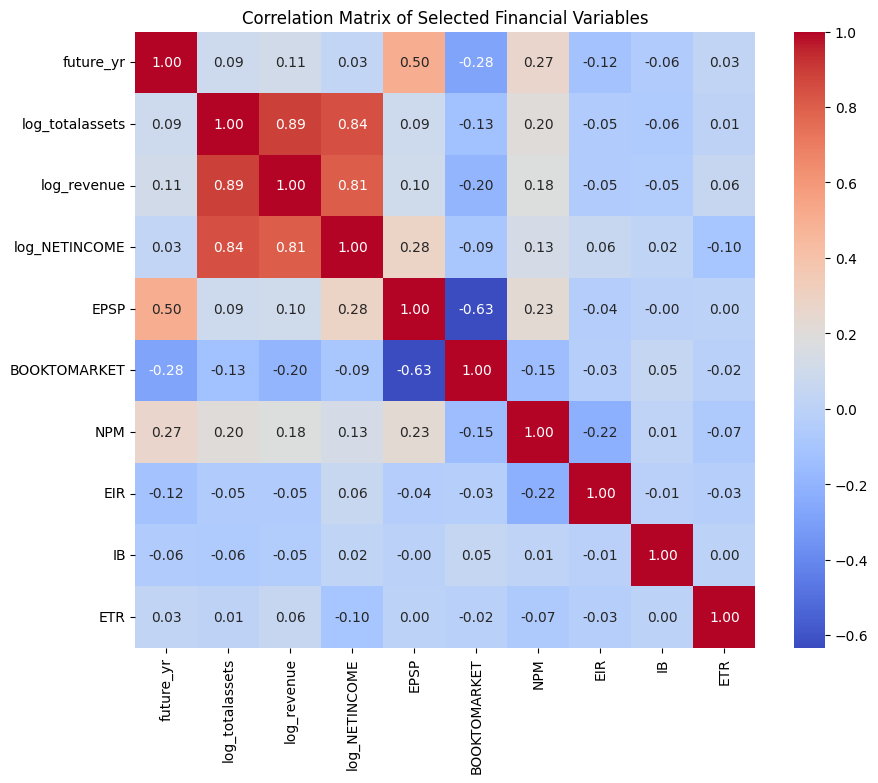

In [ ]:
# Creacion de heatmap

# Crear un heatmap para la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Financial Variables')
plt.show()


* 'EPSP' ES LA VARIABLE QUE MUESTRA LA CORRELACIÓN POSITIVA MÁS FUERTE CON LOS RETORNOS ANUALES FUTURO, SUGIRIENDO QUE AQUELLO QUE REPRESENTA EL 'EPSP' ES UN FACTOR IMPORTANTE QUE PODRÍA ESTAR RELACIONADO CON MEJORES RETORNOS.
* 'BOOKMARKET' TIENE UNA CORRELACIÓN MODERADA CON LOS RETORNOS ANUALES FUTUROS, ESTO INDICA QUE UN ALTO RATIO DE VALOR EN LIBROS A VALOR DE MERCADO PODRÍA ESTAR ASOCIADO A UN MENOR RETORNO FUTURO.
* 'LAS DEMÁS VARIABLES MUESTRAN CORRELACIONES MUY DÉBILES, AL PARECER NO TIENEN UNA RELACIÓN LINEAL SIGNIFICATIVA CON LOS RETORNOS EN ESTE MISMO CONTEXTO.

LOS RESULTADOS SUGIEREN QUE DENTRO DE LA INDUSTRIA DE CONSTRUCCIÓN Y UTILIZANDO DATOS ANUALES, EL 'EPSP' ES EL PREDICTOR MÁS FUERTE DE LOS RETORNOS ANUALES FUTUROS.

# **1.4.3 Regression Model**


For each financial ratio, do the following:

1. Do a histogram and interpret it

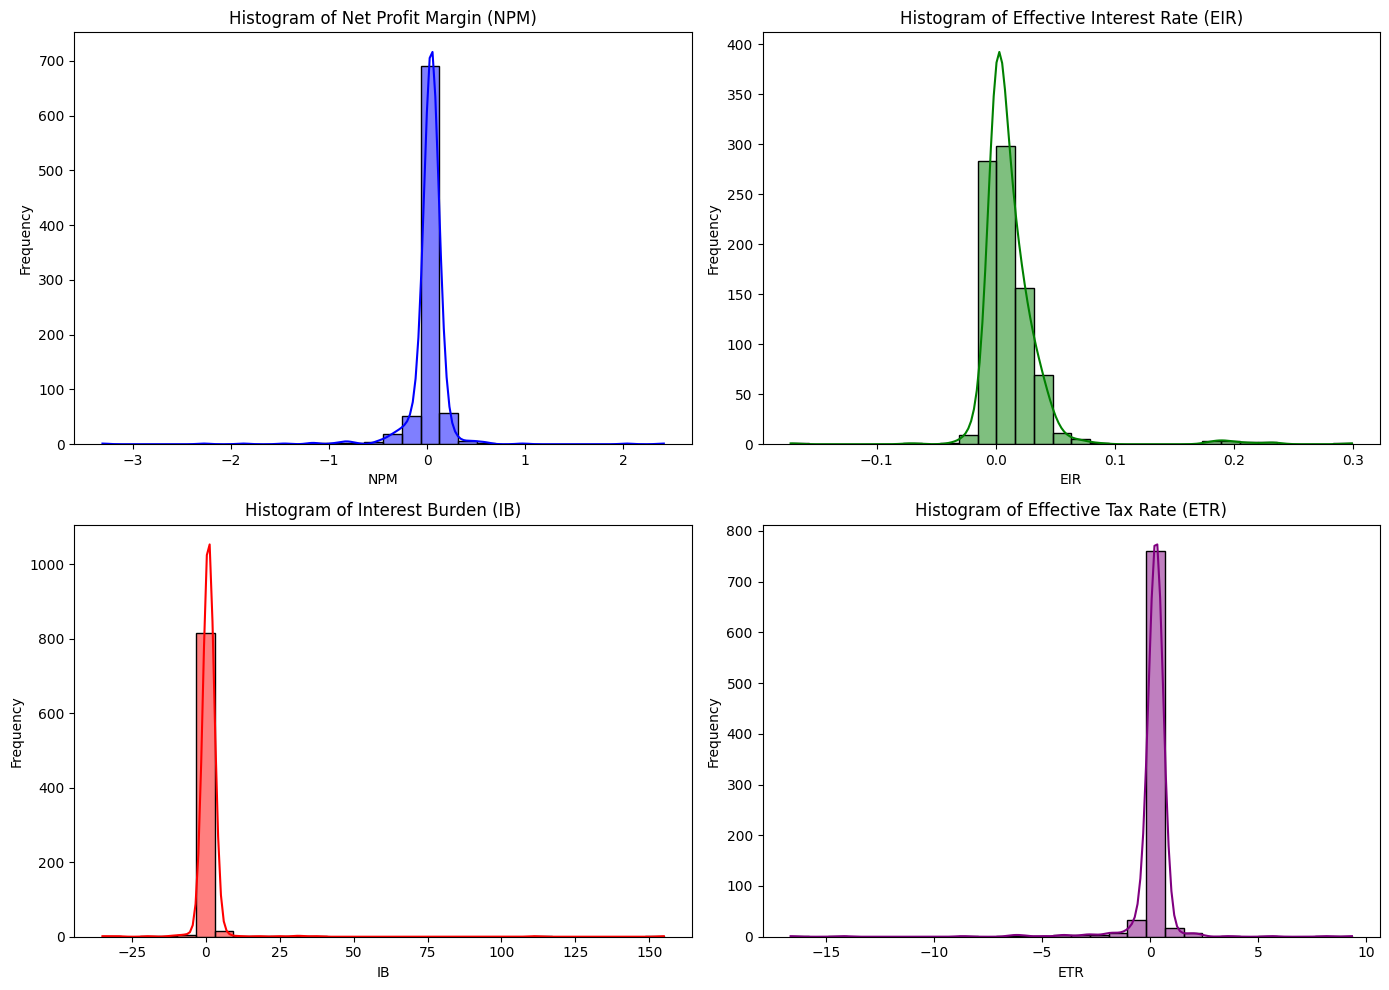

In [ ]:

# Filtrar los datos para incluir solo la industria de construcción y datos anuales
construction_data = data[(data['industria'] == 'Construcción') & (data['fiscalmonth'] == 12)]

# Hacer un histograma para cada ratio financiero
plt.figure(figsize=(14, 10))

# Histograma para NPM (Net Profit Margin)
plt.subplot(2, 2, 1)
sns.histplot(construction_data['NPM'].dropna(), bins=30, kde=True, color='blue')
plt.title('Histogram of Net Profit Margin (NPM)')
plt.xlabel('NPM')
plt.ylabel('Frequency')

# Histograma para EIR (Effective Interest Rate)
plt.subplot(2, 2, 2)
sns.histplot(construction_data['EIR'].dropna(), bins=30, kde=True, color='green')
plt.title('Histogram of Effective Interest Rate (EIR)')
plt.xlabel('EIR')
plt.ylabel('Frequency')

# Histograma para IB (Interest Burden)
plt.subplot(2, 2, 3)
sns.histplot(construction_data['IB'].dropna(), bins=30, kde=True, color='red')
plt.title('Histogram of Interest Burden (IB)')
plt.xlabel('IB')
plt.ylabel('Frequency')

# Histograma para ETR (Effective Tax Rate)
plt.subplot(2, 2, 4)
sns.histplot(construction_data['ETR'].dropna(), bins=30, kde=True, color='purple')
plt.title('Histogram of Effective Tax Rate (ETR)')
plt.xlabel('ETR')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

1. **NET PROFIT MARGIN**
* EL HISTOGRAMA MUESTRA UNA DISTRIBUCIÓN MUY CONCENTRADA ALREDEDOR DE 0, CON UNA PEQUEÑA ASIMETRÍA HACIA LA IZQUIERDA, DONDE HAY MÁS VALORES NEGATIVOS.
* LA MAYORIA DE LAS EMPRESAS TIENEN UN 'NPM' CERCANO A CERO, LO QUE NOS DICE QUE LOS MÁRGENES DE BENEFICIO SON BAJOS PARA LA MAYORÍA DE LAS FIRMAS EN LA INDUSTRIA DE CONSTRUCCIÓN.
* EXISTEN ALGUNOS VALORES FUERA DE LO ORDINARIO (OUTLIERS), CON MÁRGENES DE BENEFICIO NEGATIVOS, ESTO INDICA FIRMAS QUE OPERAN CON PÉRDIDAS.

2. **EFFECTIVE INTEREST RATE**
* LA MAYORÍA DE LAS EMPRESAS TIENEN COSTOS DE DEUDA BAJOS, TAL VEZ PORQUE TIENEN NIVELES BAJOS DE DEUDAS O TIPOS DE INTERÉS REDUCIDOS. AUN ASÍ, ALGUNAS EMPRESAS ENFRENTAN TASAS DE INTERÉS MÁS ALTAS, LO QUE PUEDE REPRESENTAR UN INDICIO DE MAYOR RIESGO FINANCIERO O MAYORES COSTOS DE FINANCIAMIENTO.

3. **INTEREST BURDEN**
* SE PUEDE OBSERVAR QUE LA MAYORÍA DE LAS EMPRESAS EN ESTA INDUSTRIA HAN MANTENIDO SU CARGA DE INTERÉS BAJO CONTROL. LOS OUTLIERS EXTREMOS PUEDEN INDICAR EMPRESAS QUE SUFREN DIFICULTADES FINANCIERAS, DONDE LOS PAGOS DE INTERESES SON ALTOS EN RELACIÓN CON SUS GANANCIAS ANTES DE IMPUESTOS.

4. **EFFECTIVE TAX RATE**
* LAS TASAS DE IMPUESTOS EFECTIVAS SON BAJAS PARA LA MAYORÍA DE LAS EMPRESAS, ALGUNAS PUEDEN ESTAR SUFRIENDO PÉRDIDAS QUE RESULTAN EN TASAS DE IMPUESTOS NEGATIVAS. LA CONCENTRACIÓN DE VALORES EN 0 PUEDE INDICAR UNA HOMOGENEIDAD EN LAS TASAS DE ESTE RATIO EN LAS EMPRESAS.

2. Do plots to visualize the possible relationship each factor might have with quarterly returns (the dependent variable).



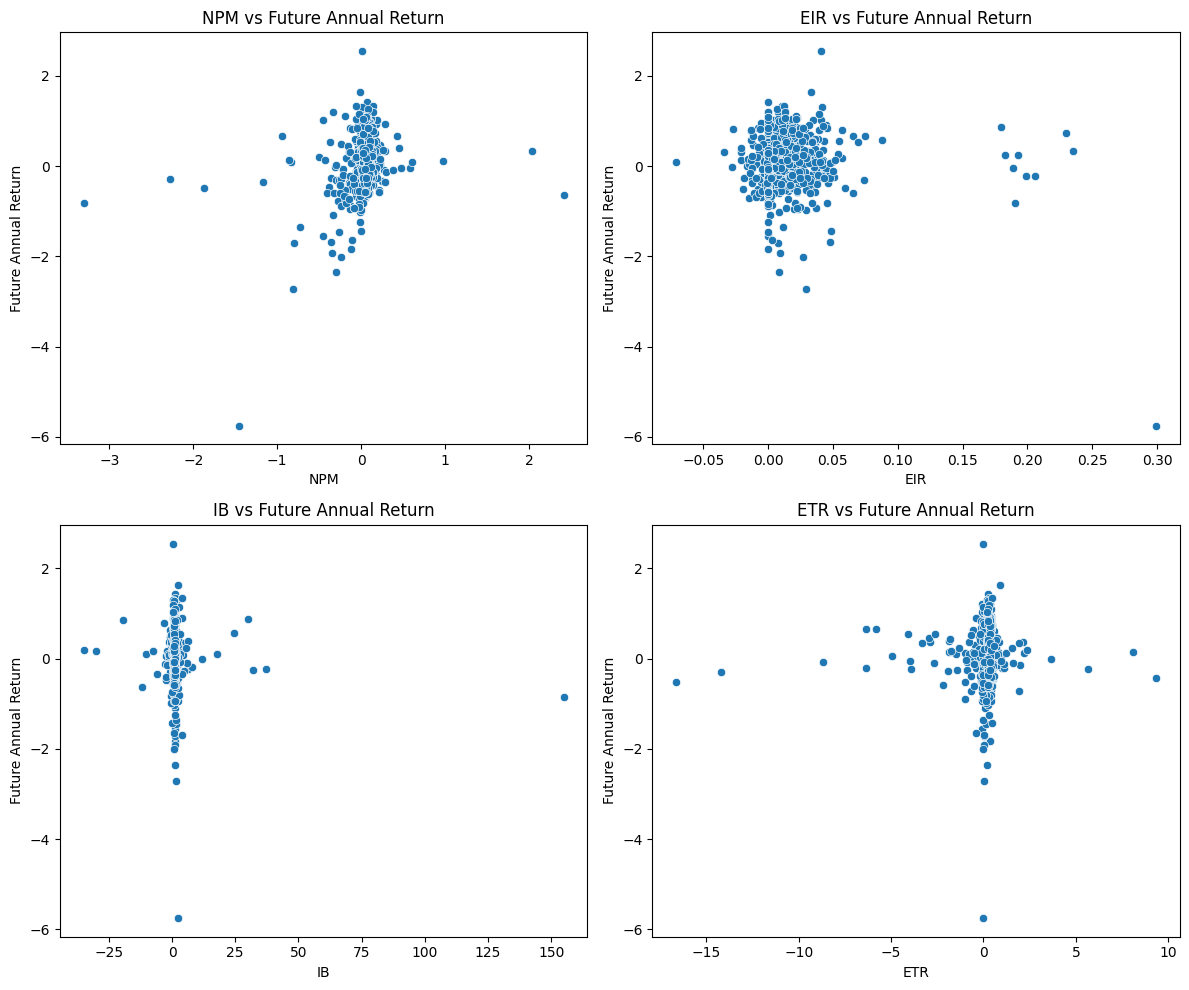

In [ ]:

# Filtrar los datos para incluir solo la industria de construcción y datos anuales
construction_data = data[(data['industria'] == 'Construcción') & (data['fiscalmonth'] == 12)]

plt.figure(figsize=(12, 10))

# Gráfico de dispersión para NPM vs Future Annual Return
plt.subplot(2, 2, 1)
sns.scatterplot(x=construction_data['NPM'], y=construction_data['future_yr'])
plt.title('NPM vs Future Annual Return')
plt.xlabel('NPM')
plt.ylabel('Future Annual Return')

# Gráfico de dispersión para EIR vs Future Annual Return
plt.subplot(2, 2, 2)
sns.scatterplot(x=construction_data['EIR'], y=construction_data['future_yr'])
plt.title('EIR vs Future Annual Return')
plt.xlabel('EIR')
plt.ylabel('Future Annual Return')

# Gráfico de dispersión para IB vs Future Annual Return
plt.subplot(2, 2, 3)
sns.scatterplot(x=construction_data['IB'], y=construction_data['future_yr'])
plt.title('IB vs Future Annual Return')
plt.xlabel('IB')
plt.ylabel('Future Annual Return')

# Gráfico de dispersión para ETR vs Future Annual Return
plt.subplot(2, 2, 4)
sns.scatterplot(x=construction_data['ETR'], y=construction_data['future_yr'])
plt.title('ETR vs Future Annual Return')
plt.xlabel('ETR')
plt.ylabel('Future Annual Return')

plt.tight_layout()
plt.show()


3. Design and run a first version of a multiple regression model to examine whether your selected ratios can explain/predict future annual stock returns.



In [ ]:
import pandas as pd

# Contar la cantidad de NaNs en cada columna
nan_counts = data.isna().sum()

# Mostrar las columnas que tienen NaNs
print("Columns with NaNs:")
print(nan_counts[nan_counts > 0])


Columns with NaNs:
fiscalmonth           304363
revenue               304376
cogs                  304376
sgae                  336849
otherincome           304376
extraordinaryitems    336849
finexp                304376
incometax             304376
totalassets           304368
currentassets         311424
inventory             348877
totalliabilities      304372
currentliabilities    348873
longdebt              323313
adjprice              305090
originalprice         304958
sharesoutstanding     238490
fixedassets           304376
yearf                 304363
fiscalq               304363
GROSSPROFIT           304376
EBIT                  336849
NETINCOME             336849
EBT                   336849
BOOKVALUE             304372
MARKETVALUE           312773
BOOKTOMARKET          318592
EPS                   340477
EPSP                  349794
QR                    310206
YR                    324850
qr                    310930
yr                    327856
future_yr             32

In [ ]:
import pandas as pd
import numpy as np

# Select numerical columns only
numerical_data = data.select_dtypes(include=np.number)

# Count the number of infinities in each numerical column
inf_counts = np.isinf(numerical_data).sum()

# Display the columns that have infinities
print("Columns with Infs:")
print(inf_counts[inf_counts > 0])

Columns with Infs:
BOOKTOMARKET       3
EPS              123
EPSP               3
NPM             9581
EIR                9
ETR               16
IB               115
dtype: int64


In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Filtrar los datos para incluir solo la industria de construcción y datos anuales
construction_data = data[(data['industria'] == 'Construcción') & (data['fiscalmonth'] == 12)]

# Seleccionar todas las variables explicativas, incluyendo los ratios y las variables de control
X = construction_data[['NPM', 'EIR', 'IB', 'ETR', 'BOOKTOMARKET', 'EPSP']]
y = construction_data['future_yr']

# Reemplazar valores infinitos con NaN
X = X.replace([np.inf, -np.inf], np.nan)

# Imputar valores faltantes en X y y con la media de cada columna
imputer_X = SimpleImputer(strategy='mean')
X_imputed = imputer_X.fit_transform(X)

imputer_y = SimpleImputer(strategy='mean')
y_imputed = imputer_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# Escalar las variables explicativas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Convertir X_scaled de nuevo a un DataFrame para mantener los nombres de las columnas
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Dividir el dataset en training y test
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y_imputed, test_size=0.2, random_state=42)

# Añadir una columna de 1 para el término de sesgo (bias)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Ajustar el modelo OLS utilizando el conjunto de entrenamiento
ols_model = sm.OLS(y_train, X_train).fit()

# Mostrar el resumen del modelo
print(ols_model.summary())

# Predecir en el conjunto de prueba
y_pred_test = ols_model.predict(X_test)

# Calcular el error cuadrático medio y el R^2 para el conjunto de prueba
mse_test = np.mean((y_test - y_pred_test) ** 2)
r2_test = 1 - (np.sum((y_test - y_pred_test) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

print(f'Mean Squared Error (Test): {mse_test}')
print(f'R-squared (Test): {r2_test}')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     17.54
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           6.47e-19
Time:                        23:17:16   Log-Likelihood:                -492.32
No. Observations:                 676   AIC:                             998.6
Df Residuals:                     669   BIC:                             1030.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0837      0.019      4.321   

**You must check for possible multicollinearity problems. Briefly explain what is multicollinearity, run and interpret the corresponding test**

LA MULTICOLIENARIDAD ES UNA SITUACIÓN EN LA QUE DOS O MÁS VARIABLES INDEPENDIENTES EN UN MODELO DE REGRESIÓN ESSTAN ALTAMENTE CORRELACIONADAS ENTRE SÍ. ESTO SIGNIFICA QUE UNA VARIABLE INDEPENDIENTE PUEDE PREDECIRSE LINEALMENTE A PARTIR DE LAS OTRAS CON UN GRADO ALTO DE PRECISIÓN.

LA MULTICOLIENARIDAD CAUSA PROBLEMAS POR DIFICULTAR LA ESTIMACIÓN PRECISA DE LOS COEFICIENTES DE REGRESIÓN, LO QUE PUEDE LLEVAR A CONCLUSIONES INCORRECTAS SOBRE LA IMPORTANCIA DE CADA VARIABLE EN EL MODELO.

UN MÉTODO PARA DETECTAR ESTO ES CALCULAR EL FACTOR DE INFLACIÓN DE LA VARIANZA (VIF). ESTE MIDE CUANTO SE INFLAN LAS VARIANZAS ESTIMADAS DE LOS COEFICIENTES DE REGRESIÓN DEBIDO A LA MULTICOLINEALIDAD.


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.impute import SimpleImputer

# Filtrar los datos para incluir solo la industria de construcción y datos anuales
construction_data = data[(data['industria'] == 'Construcción') & (data['fiscalmonth'] == 12)]

# Seleccionar las variables independientes
X = construction_data[['NPM', 'EIR', 'IB', 'ETR', 'BOOKTOMARKET', 'EPSP']]

# Reemplazar valores infinitos por NaN
X = X.replace([np.inf, -np.inf], np.nan)

# Imputar valores faltantes (NaN) con la media de cada columna
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Añadir la constante para el término de sesgo
X_imputed = sm.add_constant(X_imputed)

# Calcular el VIF para cada variable independiente
vif_data = pd.DataFrame()
vif_data['Variable'] = ['const'] + X.columns.tolist()
vif_data['VIF'] = [variance_inflation_factor(X_imputed, i) for i in range(X_imputed.shape[1])]

# Mostrar los resultados
print(vif_data)


       Variable       VIF
0         const  2.324163
1           NPM  1.116881
2           EIR  1.061696
3            IB  1.002608
4           ETR  1.007429
5  BOOKTOMARKET  1.682199
6          EPSP  1.720462


***LA MULTICOLINEALIDAD***

ES UN FENÓMENO QUE OCURRE EN LOS MODELOS DE REGRESIÓN CUANDO DOS O MÁS VARIABLES INDEPENDIENTES ESTÁN ALTAMENTE CORRELACIONADAS ENTRE SÍ.

PODRÍA DECIRSE QUE ES CUANDO UNA VARIBALE INDEPENDIENTE PUEDE PREDECIRSE EN GRAN MEDIDA A PARTIR DE LAS OTRAS VARIABLES INDEPENDIENTES. ESTO GENERA PROBLEMAS EN EL MODELO DE REGRESIÓN Y EN LA INTERPRETACIÓN DE LOS COEFICIENTES.


TODOS LOS VIF ESTÁN POR DEBAJO DE 2, LO QUE ES UN VALOR BAJO. ESTO SUGIERE QUE NO HAY MULTICOLINEALIDAD SIGNIFICATIVA ENTRE LAS VARIABLES DEL MODELO. CADA VARIABLE INDEPENDIENTE NO ESTÁ ALTAMENTE CORRELACIONADA CON LAS DEMÁS, LO QUE SIGNIFICA QUE CADA UNA APORTA SU PROPIA INFORMACIÓN AL MODELO SIN ALGÚN TIPO DE REDUNDANCIA.

# **INTERPRETACIÓN DEL MODELO**

INTERPRETACIÓN DEL COEFICIENTE (CONST):

VALOR: 0.0837

LA CONSTANTE INDICA QUE CUANDO TODAS LAS VARIABLES INDEPENDIENTES QUE UTILIZAMOS TIENEN UN VALOR DE CERO, EL RETORNO ANUAL FUTURO PREDICHO ES DE 0.0837. EN ESTE CONTEXTO, ESTO NO SUELE SER ALGO IMPORTANTE, YA QUE LAS VARIABLES RARAMENTE TIENEN UN VALOR DE 0.

ES ALTAMENTE SIGNIFICATIVO CON P-VALOR DE O.000, LO QUE SUGIERE QUE ES PARTE IMPORTANTE DEL MODELO.



**NPM**

COEFICIENTE: 0.1154

EL AUMENTO EN ESTE RATIO FINANCIERO ESTÁ SOCIADO CON UN AUMENTO DE 0.1154 EN LOIS RETORNOS ANUALES FUTUROS, MANTENIENDO LAS OTRAS VARIABLES CONSTANTES.

ES ALTAMENTE SIGNIFICATIVO, LO QUE SUGIERE QUE ES PARTE IMPORTANTE PARA LOS RETORNOS ANUALES FUTUROS.

INTERVALO DE CONFIANZA: EL INTERVALO DE CONFIANZA AL 95% PARA EL COEFICIENTE DE 'NPM' ES (0.079, 0.152). GRACIAS A QUE ESTE INTERVALO NO TIENE UN VALOR DE 0, QUIERE DECIR QUE ES UN COEFICIENTE ESTADÍSTICAMENTE SIGNIFICATIVO.

**ESTA VARIABLE 'NPM' (NET PROFIT MARGIN) TIENE EL COEFICIENTE MÁS ALTO (0.1154) Y ES ALTAMENTE SIGNIFICATIVO (P-VALUE DE 0), ES EL MEJOR PREDICTOR DE LOS RETORNOS FUTUROS EN ESTE MODELO DE REGRESIÓN. ESTO QUIERE DECIR QUE LAS EMPRESAS CON MAYORES MÁRGENES DE BENEFICIO TIENDEN A GENERAR RETORNOS ANUALES MÁS ALTOS.**

**EIR**


COEFICIENTE: -0.0516
 EL AUMENTO DE ESTA VARIABLE ESTÁ ASOCIADO A UNA DISMINUCIÓN EN LOS RETORNOS ANUALES FUTUROS, CUENTA CON UN P-VALOR DEL 0.007, LO QUE INDICA QUE TIENE UNA INFLUENCIA NEGATIVA IMPORTANTE PARA LOS RETORNOS FUTUROS.

INTERVALO DE CONFIANZA: DE (-0.089, -0.014), ESTO INDICA SU RELACION ESTADÍSTICAMENTE SIGNIFICATIVA COMO UNA RELACIÓN NEGATIVA.

 **IB**

 COEFICIENTE DE -0.0224
 ESTA VARIABLE ESTA ASOCIADA CON UNA DISMINUCIÓN EN LOS RETORNOS ANUALES FUTUROS, AUNQUE SEA ALGO PEQUEÑO. CON UN P-VALOR DE 0.198, NO TIENE UN IMPACTO CLARO EN LOS RETORNOS.

 INTERVALO DE CONFIANZA: (-0.057, 0.012), INDICA UNA RELACIÓN ESTADÍSTICAMENTE SIGNIFICATIVA.

**ETR**

COEFICIENTE: 0.0092

EL AUMENTO DE LA TASA DE IMPUESTOS EFECTIVA (ETR) ESTA ASOCIADO CON UN AUMENTO DEL 0.0092 EN LOS RETORNOS ANUALES FUTUROS, ES UNA CANTIDAD PEQUEÑA. NO ES ESTADÍSTICAMENTE SIGNIFICATIVO, GRACIAS A SU P-VALOR DE 0.673, LO QUE NOS INDICA QUE ESTA VARIABLE NO ES UN BUEN PREDICTOR DE LOS RETORNOS ANUALES FUTUROS.

INTERVALO DE CONFIANZA: (-0.034, -0.052), AL NO TENER UN VALOR DE CERO, PODEMOS DECIR QUE ES ESTADÍSTICAMENTE SIGNIFICATIVO.


**BOOKTOMARKET**

COEFICIENTE: -0.1621

UN AUMENTO EN LA CANTIDAD DE BOOKTOMARKET DISMINUYE EL VALOR DE LOS RETORNOS ANUALES FUTUROS, ESTO QUIERE DECIR QUE LAS EMPRESAS CON UN ALTO VALOR EN LIBROS EN RELACIÓN CON EL MERCADO, TIENDEN A TENER MENORES RETORNOS FUTUROS.
ALTAMENTE SIGNIFICATIVO CON UN P-VALOR DE 0.000, ES UN PREDICTOR FUERTE Y NEGATIVO DE LOS RETORNOS ANUALES FUTUROS.

**EPSP**

COEFICIENTE: -0.0973

UN AUMENTO EN ESTA VARIABLE ESTA RELACIONADA CON UNA DISMINUCIÓN EN LOS RETORNOS ANUALES FUTUROS. LAS EMPRESAS CON MAYOR PREVISIBILIDAD DE GANNACIAS PUEDE QUE NO GENEREN ALTOS RETORNOS FUTUROS.

 **R^2**


 EL R^2 DEL 7% INDICA QUE EL MODELO EXPLICA SOLO ESA PARTE DE LA VARIABILIDAD EN LOS RETORNOS ANUALES FUTUROS. ESTE VALOR ES RELATIVAMENTE BAJO, LO QUE DA A ENTENDER QUE EXISTEN OTROS FACTORES NO INCLUIDOS EN EL MODELO QUE PODRÍAN ESTAR AFECTANDO LOS RETORNOS.

ESTE MODELO MUESTRA A ALGUNOS RATIOS FINANCIEROS QUE TIENEN UN IMPACTO SIGNIFICATIVO EN LOS RETORNOS ANUALES FUTUROS (NPM, BOOKTOMARKET, EPSP). EL RATIO DE MAYOR MARGEN DE BENEFICIO NETO **(NPM)** ESTÁ POSITIVAMENTE RELACIONADO CON LOS RETORNOS FUTUROS, MIENTRAS QUE LOS ALTOS VALORES DE  BOOKTOMARKET Y EPSP SE RELACIONAN CON MENORES RETORNOS ANUALES FUTUROS.

EL VALOR BAJO DE R^2, INDICA QUE EL MODELO ES ÚTIL PARA IDENTIFICAR ALGUNAS RELACIONES CLAVE, PERO NO CAPTURA DE MOMENTO LA COMPLEJIDAD DEL COMPORTAMIENTO DE LOS RETORNOS ANUALES FUTUROS. ES NECESAROI CONSIDERAR OTRAS VARIABLES O FACTORES EXTERNOS PARA MEJORAR EL PODER PREDICTIVO DEL MODELO.



***R^2 AJUSTADO***
EL R^2 AJUSTADO DE 0.128 (12.8%) NOS EXPLICA QUE DESPUÉS DE TENER EN CUENTA EL NÚMERO DE PREDICTORES EN EL MODELO, SE EXPLICA EL 12.8% DE LA VARIABILIDAD EN LOS RETORNOS ANUALES FUTUROS. ES UN VALOR DE R^2 AJUSTAD BAJO, AUNQUE PUEDE LLEGAR A SER ALGO COMÚN EN CONTEXTOS DE ESTUDIOS FINANCIEROS GRACIAS A LA VOLATILIDAD DE LOS RETORNOS. ESTO PUEDE DAR A ENTENDER QUE EXISTEN OTROS FACTORES QUE INFLUYEN EN LOS RETORNOS FUTUROS.



# TOMA DE DECISIONES RESPECTO AL CONTEXTO Y EL MODELO

ESTE MODELO REVELA QUE VARIABLES COMO EL MARGEN DE BENEFICIO NETO (NPM) TIENEN UN IMPACTO POSITIVO EN LOS RETORNOS ANUALES FUTUROS, MIENTRAS QUE RATIOS COMO 'BOOKTOMARKET' Y 'EPSP' TIENEN UN IMPACTO NEGATIVO PARA ESTOS MISMOS RETORNOS.

SI TOMAMOS EN CUENTA EL CONTEXTO DE LA SITUACIÓN, ES IMPORTANTE QUE SI ALGÚN INVERSOR ESTÁ INTERESADO, DEBE DE PRIORIZAR EMPRESAS CON MÁRGENES DE BENEFICIO ALTOS Y EVITAR AQUELLAS CON VALORES CONTABLES ELEVADOS EN RELACIÓN CON SU VALOR DE MERCADO.

AUNQUE EL TENER CIERTA VISIÓN DE GANANCIAS A FUTURO SEA EL OBJETIVO, NO SIEMPRE GARANTIZA QUE SE TENGAN ALTOS RETORNOS COMO SE ESPERA.


# IMPROVEMENTS

**Regarding descriptive statistics of financial ratios**



In [ ]:
filtered_data = data[(data['industria'] == 'Construcción') &
                     (data['fiscalmonth'] == 12) &
                     (data['year'] == 2023)]

# Calcular la media aritmética, mediana y media ponderada para cada ratio
descriptive_stats = {}

# NPM (Net Profit Margin)
npm_mean = filtered_data['NPM'].mean()
npm_median = filtered_data['NPM'].median()
npm_weighted_avg = filtered_data['NETINCOME'].sum() / filtered_data['revenue'].sum()

descriptive_stats['NPM'] = {'mean': npm_mean, 'median': npm_median, 'weighted_avg': npm_weighted_avg}

# EIR (Effective Interest Rate)
eir_mean = filtered_data['EIR'].mean()
eir_median = filtered_data['EIR'].median()
eir_weighted_avg = filtered_data['finexp'].sum() / filtered_data['totalliabilities'].sum()

descriptive_stats['EIR'] = {'mean': eir_mean, 'median': eir_median, 'weighted_avg': eir_weighted_avg}

# IB (Interest Burden)
ib_mean = filtered_data['IB'].mean()
ib_median = filtered_data['IB'].median()
ib_weighted_avg = filtered_data['EBT'].sum() / filtered_data['EBIT'].sum()

descriptive_stats['IB'] = {'mean': ib_mean, 'median': ib_median, 'weighted_avg': ib_weighted_avg}

# ETR (Effective Tax Rate)
etr_mean = filtered_data['ETR'].mean()
etr_median = filtered_data['ETR'].median()
etr_weighted_avg = filtered_data['incometax'].sum() / filtered_data['EBT'].sum()

descriptive_stats['ETR'] = {'mean': etr_mean, 'median': etr_median, 'weighted_avg': etr_weighted_avg}

# Mostrar los resultados
for ratio, stats in descriptive_stats.items():
    print(f"{ratio} - Media: {stats['mean']}, Mediana: {stats['median']}, Media Ponderada: {stats['weighted_avg']}")


NPM - Media: 0.030301647386964364, Mediana: 0.07025626751794783, Media Ponderada: 0.07979096616271378
EIR - Media: 0.014686195685264547, Mediana: 0.004442284087125593, Media Ponderada: 0.019832265606789832
IB - Media: 0.818677887111943, Mediana: 0.9667366097454607, Media Ponderada: 0.9229669180455283
ETR - Media: 0.1402153849995211, Mediana: 0.24010353429168854, Media Ponderada: 0.24508080302731142


***COMPARACIÓN DE LA MEDIA PONDERADA CON LA MEDIA ARITMÉTICA Y LA MEDIANA***

**NPM (NET PROFIT MARGIN):**

MEDIA ARITMÉTICA: 0.0303

MEDIANA: 0.0703

MEDIA PONDERADA: 0.0798

COMPARACIÓN: LA MEDIA PONDERADA ES MAYOR QUE LA MEDIA ARITMÉTICA Y LA MEDIANA, ESTO SUGIERE QUE LAS EMPRESAS MÁS GRANDES EN TÉRMINOS DE INGRESOS TIENDEN A TENER MÁRGENES DE BENEFICIO MÁS ALTOS. ESTO INDICA QUE LAS EMPRESAS MÁS GRANDES SON MÁS EFICIENTES EN LA GENERACIÓN DE GANANCIAS A PARTIR DE SUS INGRESOS.



**EIR (EFFECTIVE INTEREST RATE)**

MEDIA ARITMÉTICA: 0.0147

MEDIANA: 0.0044

MEDIA PONDERADA: 0.0198

EN ESTE CASO LA MEDIA PONDERADA ES MAYOR QUE LA MEDIA ARITMÉTICA Y LA MEDIANA, LO QUE ME DICE QUE LAS FIRMAS MÁS GRANDES TIENEN UNA TASA DE INTERÉS EFECTIVA MÁS ALTA. LAS EMPRESAS CON MÁS DEUDAS ESTÁN PAGANDO TASAS DE INTERÉS MAS ALTAS.

**IB (INTEREST BURDEN)

MEDIA ARITMÉTICA: 0.8187

MEDIANA: 0.9667

MEDIA PONDERADA: 0.9229

LA MEDIA PONDERADA ES MAYOR QUE LA MEDIA ARITMÉTICA PERO MENOR QUE LA MEDIANA. ESTO INDICA UNA CARGA DE INTERES QUE TIENDE A SER MÁS ALTA EN FIRMAS GRANDES, PERO LA VARIABILIDAD EN LA CARGA DE INTERÉS ES CONSIDERABLE TAMBIÉN.

**ETR (EFFECTIVE TAX RATE)**

MEDIA ARITMÉTICA: 0.1402

MEDIA PONDERADA: 0.2455

AQUÍ LA MEDIA PONDERADA ES MÁS ALTA, LUEGO SIGUE LA MEDIANA Y AL FINAL LA MEDIA ARITMÉTICA. LAS FIRMAS MÁS GRANDES EN LA INDUSTRIA ESTÁN PAGANDO TASAS DE IMPUESTOS MÁS ALTAS, LO QUE AFECTA SU RENTABILIDAD.

**¿CUÁL ES LA MEJOR MEDIDA DE TENDENCIA CENTRAL?**

* PARA NPM Y EIR: LA MEDIA PONDERADA PARECE QUE ES LA MEJOR MEDIDA DE TENDENCIA CENTRAL AL REFLEJAR MEJOR EL IMPACTO DE LAS EMPRESAS MÁS GRANDES Y SU INFLUENCIA EN EL MERCADO.

* PARA IB Y ETR: LA MEDIANA PUEDE SER MÁS REPRESENTATIVA, YA QUE ES LA MENOS AFECTADA POR LOS VALORES EXTREMOS Y PROPORCIONA UNA MEJOR IDEA DEL RATIO TÍPICO QUE SE PUEDE ESPERAR EN LA MAYORÍA DE LAS EMPRESAS EN LA INDUSTRIA DE CONSTRUCCIÓN.








***INTERPRETACIÓN Y MEDIDA DE TENDENCIA CENTRAL MAS APROPIADA***

NPM: LA MEDIA PONDERADA ES UNA BUENA MEDIDA AQUI, SE EQUILIBRAN LA INFLUENCIA DE LAS FIRMAS MÁS GRANDES Y PEQUEÑAS, OFRECIENDO UNA VISIÓN QUE REPRESENTA EL MARGEN DE BENEFICIO DE TODA LA INDUSTRIA DE CONSTRUCCIÓN.

EIR: LA MEDIA PONDERADA MUESTRA QUE LAS FIRMAS MÁS GRANDES TIENEN UNA TASA DE INTERÉS EFECTIVA MÁS ALTA, ES IMPORTANTE ENTENDER EL COSTO DE LA DEUDA EN LA INDUSTRIA. GRACIAS A QUE LA MEDIA ARITMÉTICA Y LA MEDIANA SON MÁS BAJAS, LA MEDIA PONDERADA OFRECE UNA VISIÓN MÁS PRECISA DE LO QUE ENFRENTAN LAS GRANDES FIRMAS DE LA INDUSTRIA.

IB: LA MEDIA PONDERADA PROPORCIONA UNA IMAGEN MÁS EQUILINBRADA DE LA CARGA DE INTERESES, LA MEDIANA SUGIERE UNA ALTA VARIABILIDAD. LA MEDIANA PUEDE SER ÚTIL PARA IDENTIFICAR EL PUNTO MEDIO, PERO LA MEDIA PONDERADA ES MÁS REPRESENTATIVA EN EL ÁMBITO GENERAL.

ETR: LA MEDIA PONDERADA ES LA MEJOR MEDIDA EN ESTE CASO, YA QUE REFLEJA QUE LAS FIRMAS GRANDES ESTÁN PAGANDO TASAS DE IMPUESTOS MÁS ALTAS, ESTO EVALUA LA RENTABILIDAD NETA EN TODA LA INDUSTRIA DE CONSTRUCCIÓN.



# SEGUNDO MODELO


**Cálculo de Coeficientes Beta usango álgebra matricial**


In [ ]:
# Calcular transpuesta de X
X_train_T = np.transpose(X_train)

# Calcular (X^T * X)
XtX = np.dot(X_train_T, X_train)

# Calcular la inversa
XtX_inv = np.linalg.inv(XtX)

# Calcular los coeficientes beta
beta_hat = np.dot(XtX_inv, np.dot(X_train_T, y_train))

# Mostrar los coeficientes beta
print("Coeficientes Beta:")
print(beta_hat)

Coeficientes Beta:
[ 0.08375     0.11539831 -0.05163004 -0.02239406  0.0091647  -0.16214832
 -0.0973193 ]


**Cálculo de los Errores Estándar de los Coeficientes Beta**

In [ ]:
# Calcular los residuos
residuals = y_train - np.dot(X_train, beta_hat)

# Calcular varianza residual
sigma_squared = np.sum(residuals ** 2) / (X_train.shape[0] - X_train.shape[1])

# Calcular la matriz de varianza-covarianza de los coeficientes
cov_matrix = sigma_squared * XtX_inv

# Calcular los errores estándar
std_errors = np.sqrt(np.diag(cov_matrix))

# Mostrar los errores estándar
print("Errores Estándar de los Coeficientes Beta:")
print(std_errors)

Errores Estándar de los Coeficientes Beta:
[0.01938392 0.0186338  0.01924083 0.01739303 0.02173751 0.02450413
 0.02354625]


**Cálculo de R^2 y R^2 ajustado**

In [ ]:
# Calcular la suma total de cuadrados (SST)
sst = np.sum((y_train - np.mean(y_train)) ** 2)

# Calcular la suma de cuadrados de los residuos (SSR)
ssr = np.sum(residuals ** 2)

# Calcular R^2
r_squared = 1 - (ssr / sst)

# Calcular R^2 ajustado
adjusted_r_squared = 1 - ((1 - r_squared) * (X_train.shape[0] - 1) / (X_train.shape[0] - X_train.shape[1]))

# Mostrar R^2 y R^2 ajustado
print("R^2:", r_squared)
print("R^2 Ajustado:", adjusted_r_squared)

R^2: 0.13592799483637175
R^2 Ajustado: 0.12817847012638406


**Cálculo de la Matriz hat (Hat Matrix)**

In [ ]:
# Calcular matriz Hat
hat_matrix = np.dot(np.dot(X_train, XtX_inv), X_train_T)

# Mostrar la matriz Hat
print("Matriz Hat (Hat Matrix):")
print(hat_matrix)



Matriz Hat (Hat Matrix):
[[ 0.00163444  0.00129907  0.00137355 ...  0.00153009  0.00116584
   0.00164428]
 [ 0.00129907  0.00240965  0.00113812 ...  0.00135161  0.00124062
   0.00531211]
 [ 0.00137355  0.00113812  0.00216171 ...  0.00162472  0.00194484
  -0.00178432]
 ...
 [ 0.00153009  0.00135161  0.00162472 ...  0.00156248  0.00135706
   0.00092725]
 [ 0.00116584  0.00124062  0.00194484 ...  0.00135706  0.00324017
  -0.00257616]
 [ 0.00164428  0.00531211 -0.00178432 ...  0.00092725 -0.00257616
   0.02722835]]


**With the hat matrix identify possible leverage observations. EXPLAIN why these observations can be leverage points.**

LOS PUNTOS DE LEVEGARE ENCONTRADOS TIENEN UN VALOR DIAGONAL ALTO EN LA MATRIZ  HAT, ESTO SIGNIFICA QUE TIENEN UN IMPACTO ALTO EN EL MODELO DE REGRESIÓN.

ALGUNA DE LAS VARIABLES INDEPENDIENTES LE DA A ESTOS PUNTOS UN VALOR ALTO, LO QUE LES DA UNA MAYOR INFLUENCIA EN LA DETERMINACIÓN DE LOS COEFICIENTES DEL MODELO.

ESTO PUEDE DAR A ENTENDER QUE HAY OBSERVACIONES ATÍPICAS EN LAS VARIABLES EXPLICATIVAS, SIN EMBARGO NO SIEMPRE SON OUTLIERS, PERO AUN ASÍ TIENEN LA CAPACIDAD DE ALTERAR LA PENDIENTE Y LOS RESULTADOS DEL MODELO.

In [ ]:
# Extraer valores diagonales de la Hat Matrix
leverage = np.diag(hat_matrix)

# Umbral para identificar leverage points
leverage_threshold = 2.0 * (X_train.shape[1] / X_train.shape[0])

# Identificar leverage points
leverage_points = np.where(leverage > leverage_threshold)[0]

# Mostrar los puntos de leverage
print("Puntos de Leverage:")
print(leverage_points)



Puntos de Leverage:
[ 18  44  63  75 108 118 121 123 137 143 154 165 180 193 235 244 273 280
 313 318 355 357 393 424 427 434 463 466 471 481 486 504 510 514 515 521
 523 536 566 575 585 619 621 624 655 675]


In [ ]:
# Mostrar los valores en las filas de los leverage_points
leverage_rows = X_train.iloc[leverage_points, :]
print("Valores en las filas de los leverage points:")
print(leverage_rows)

Valores en las filas de los leverage points:
     const        NPM        EIR         IB        ETR  BOOKTOMARKET  \
334    1.0  -0.189024   0.264911   4.040727  -0.132387  2.162972e-02   
658    1.0   0.585178   7.840801  -0.081285   0.075441  9.491645e-02   
338    1.0   0.635892  -0.195696  -0.048274  -3.650409 -1.832958e-01   
136    1.0   0.138069   7.158767  -0.115498   0.196341  7.678893e-02   
381    1.0  -9.486286   0.719976  -0.041323  -0.005911 -3.694633e-01   
309    1.0  -1.152602   1.176023   0.021801  -0.113434 -4.417773e+00   
296    1.0  -1.345231  -0.175921  -0.001787   0.049251  1.361873e+01   
61     1.0   0.456772  -6.548224  -0.025897   0.047031  4.248351e-01   
482    1.0  -0.197872   0.293851   4.300753   0.099086 -5.898092e-01   
248    1.0  -0.137200   1.332382   4.997169  -0.129616  6.532766e-01   
836    1.0   1.829654  -0.135426  -0.077745  -5.279397  6.502485e-02   
42     1.0  -7.820748   1.647283  -0.036539  -0.132069  1.997816e+00   
770    1.0   9.8939

AQUÍ PODEMOS OBSERVAR AQUELLAS FILAS LAS CUALES FORMAN PARTE DE LOS LEVERAGE POINTS, ES DECIR, AQUELLAS FILAS QUE LLEGAN A CAUSAR CIERTAS ANORMALIDADES DENTRO DEL DATASET Y EL MODELO A UTILIZAR.

SE REALIZÓ ESTE FILTRO PARA MOSTRAR AQUELLAS FILAS QUE FORMAN PARTE DEL LEVERAGE, PARA SABER SI ESTÁN MÁS INCLINADAS A VALORES NEGATIVOS O POSITIVOS, PARA ASÍ POSTERIORMENTE DECIDIR DE QUÉ MANERA REALIZAR LA WINZORIZACIÓN DE LOS DATOS AL IDENTIFICAR TODOS LOS DATOS LEVERAGE.

In [ ]:
# Calcular estadísticas descriptivas de los leverage points

leverage_stats = pd.DataFrame(leverage_rows).describe()
print("Estadísticas descriptivas de los leverage points:")
print(leverage_stats)

Estadísticas descriptivas de los leverage points:
       const        NPM        EIR         IB        ETR  BOOKTOMARKET  \
count   46.0  46.000000  46.000000  46.000000  46.000000     46.000000   
mean     1.0  -0.504736   1.435893   0.813533  -0.916935      0.858014   
std      0.0   3.817409   3.221730   4.156253   3.045816      3.582762   
min      1.0 -13.758930  -6.548224  -5.056116 -12.327503     -4.667829   
25%      1.0  -0.591096  -0.319129  -0.123453  -0.218799     -0.257141   
50%      1.0  -0.038000   0.279381  -0.068746  -0.119688      0.000282   
75%      1.0   0.534081   1.568557  -0.007815   0.076711      0.619321   
max      1.0   9.893906  10.117573  21.440378   7.878690     17.794759   

            EPSP  
count  46.000000  
mean   -0.681173  
std     4.256092  
min   -28.792153  
25%    -0.002833  
50%     0.044249  
75%     0.070788  
max     0.261569  


**Identify possible outliers using studentized residuals. EXPLAIN your criteria to identify these outliers, and how studentized residuals work.**

LOS STUDENTIZED RESIDUALS SON RESIDUOS AJUSTADOS POR SU VARIANZA, LO QUE LOS HACE MÁS GRANDES PARA IDENTIFICAR OUTLIERS EN EL ANÁLISIS DE REGRESIÓN. ESTOS SE CALCULAN DIVIDIENDO EL RESIDUO ESTÁNDAR POR SU DESVIACIÓN ESTÁNDAR.



In [ ]:

# Calcular studentized residuals
influence = ols_model.get_influence()
studentized_residuals = influence.resid_studentized_external
cooks_d = influence.cooks_distance[0]

# Mostrar los studentized residuals
print("Studentized Residuals:")
print(studentized_residuals)

Studentized Residuals:
[ 5.22130226e-01 -1.69367095e+00  1.09260146e+00 -5.72734493e-01
  2.72517459e-01  6.11089994e-01  8.69426658e-01  7.13005441e-02
 -3.57957966e-01 -3.73514038e-01 -4.16694281e-02 -2.72565169e+00
  5.35533151e-01 -2.92242733e-01 -6.03658186e-01 -1.08960974e+00
 -3.81375866e-01 -2.25326708e-02  1.88256254e+00  5.64130451e-01
 -1.07571188e+00  6.68928052e-01  4.60695343e-02 -3.46106889e-01
  1.30961567e-01 -5.83932909e-01  1.05183032e-01  5.09498928e-01
  1.84593143e+00 -5.26447290e+00 -6.37096139e-01 -4.90320329e-01
 -4.98396582e-02 -2.26476484e+00 -3.84367442e-01  3.53281608e-01
 -5.08631148e-01 -2.28177962e-01  4.23832068e-01 -3.77078353e-01
 -8.96495490e-02 -2.58798504e-01  7.78494484e-01 -9.74112445e-02
  1.29215200e+00  9.97148367e-05  1.23730952e+00  2.53948520e-01
  7.65001026e-01 -3.03884680e-01  8.95001832e-01 -2.02345141e-01
  5.62599548e-01  3.84813462e-01 -6.85848189e-01 -6.55120323e-02
 -4.19202811e-02 -6.78381311e-01  4.95798486e-01 -1.09185330e+00
  

**Identify possible outliers using Cook’s distance. EXPLAIN your criteria to identify outliers with Cook’s distance and how they work.**

EN ESTE CASO USAMOS UN CRITERIO DE VALORES MAYORES A 3 PARA IDENTIFICAR OUTLIERS EN LOS STUDENTIZED RESIDUALS. ESTO ME INDICA QUE LA OBSERVACIÓN ESTÁ LEJOS DE LO ESPERADO EN TÉRMINOS DE DESVIACIONES ESTÁNDAR.

SE ENCONTRO OUTLIERS AQUELLOS STUDENTIZED RESIDUALS ENCONTRADOS FUERA DEL RANGO, LO QUE ME DICE QUE ESTAS OBSERVACIONES TIENEN VALORES ALTOS O BAJOS Y NO SIGUEN EL PATRÓN GENERAL DEL MODELO.

In [ ]:

# Identificar outliers
outliers = np.where(np.abs(studentized_residuals) > 3)[0]

# Mostrar los outliers
print("Outliers:")
print(outliers)


Outliers:
[ 29 150 180 251 388 414 427 510 537]


In [ ]:
n = X_train.shape[0]
k = X_train.shape[1] - 1

# Calcular el nuevo umbral para Cook's Distance
cooks_threshold = 4 / (n - k - 1)

# Identificar posibles outliers utilizando umbral de Cook's Distance
outliers_cooks = np.where(cooks_d > cooks_threshold)[0]

# Mostrar los puntos influyentes basados en la distancia de Cook
print(f"Posibles outliers con Cook's Distance mayor a {cooks_threshold}: {outliers_cooks}")


Posibles outliers con Cook's Distance mayor a 0.005979073243647235: [ 11  18  29  33  44  75 108 118 121 125 165 180 235 244 251 261 312 313
 357 370 386 388 405 414 424 427 486 510 515 536 575 619 655 675]


In [ ]:
# Identificar outliers basados en residuos studentizados
outliers_studentized = np.where(np.abs(studentized_residuals) > 3)[0]

# Identificar observaciones influyentes basadas en la distancia de Cook
influential_cooks = np.where(cooks_d > cooks_threshold)[0]

# Combinar ambas listas para obtener observaciones influyentes
influential_observations = np.intersect1d(outliers_studentized, influential_cooks)

# Mostrar las observaciones influyentes
print("Observaciones influyentes identificadas:", influential_observations)


Observaciones influyentes identificadas: [ 29 180 251 388 414 427 510]




LA DISTANCIA DE COOK MIDE CUÁNTO INFLUYE UNA OBSERVACIÓN EN EL MODELO DE REGRESIÓN. VALORES ALTOS DE COOK SUGIEREN QUE ELIMINAR ESA OBSERVACIÓN PODRÍA CAMBIAR SIGNIFICATIVAMENTE LOS COEFICIENTES DEL MODELO, INDICANDO QUE ES ALGÚN TIPO DE OUTLIER. EL CRITERIO CONSIDERADO ES UNA OBSERVACIÓN INFLUYENTE CUANDO LA DISTANCIA DE COOK ES MAYOR A 1.

In [ ]:
import pandas as pd
from scipy.stats.mstats import winsorize

# Nombres de las variables originales en el dataset
variable_names = ['NPM', 'EIR', 'IB', 'ETR', 'BOOKTOMARKET', 'EPSP']

# Winsorizar las variables para limitar los valores extremos
# Convert the DataFrame to a NumPy array
X_winsorized = winsorize(X_train.values, limits=[0.024, 0.024])  # 2% en el lado inferior y 1% en el lado superior

# Convert the winsorized array back to a DataFrame (if needed)
X_winsorized = pd.DataFrame(X_winsorized, columns=X_train.columns)

# Mostrar los datos winsorizados
print("Datos Winsorizados:")
print(X_winsorized)

Datos Winsorizados:
     const       NPM       EIR        IB       ETR  BOOKTOMARKET      EPSP
0      1.0  0.105482 -0.294313 -0.044427  0.103651     -0.014983  0.053769
1      1.0 -0.182143  0.396761  0.030020 -0.160247      0.506578  0.019562
2      1.0  0.023770  0.401717 -0.063650  0.223363     -0.422130  0.051897
3      1.0  0.493623  0.370412 -0.047103  0.205567     -0.254620  0.073013
4      1.0 -0.050573  1.000000 -0.169451 -0.794726     -0.065855  0.045736
..     ...       ...       ...       ...       ...           ...       ...
671    1.0  0.036083 -0.460860 -0.048647  0.204918      0.411956  0.080568
672    1.0 -0.158897  0.103526 -0.474562 -0.126700      0.225827  0.038717
673    1.0  0.072872 -0.003130 -0.059410  0.166000     -0.089036  0.054786
674    1.0 -0.239582  0.513938 -0.233563 -0.608967     -0.588521  0.036883
675    1.0 -0.794726 -0.460860  0.036979  0.009875      1.000000 -0.569240

[676 rows x 7 columns]


EL PORCENTAJE DE OUTLIERS FUE CALCULADO UTILIZANDO LAS OBSERVACIONES INFLUYENTES IDENTIFICADAS MEDIANTE LA DISTANCIA DE COOK, QUE ARROJÓ UN TOTAL DE 33 OBSERVACIONES CONSIDERADAS COMO OUTLIERS. AL COMPARAR ESTAS 33 OBSERVACIONES CON EL NÚMERO TOTAL DE DATOS DISPONIBLES (APROXIMADAMENTE 676), SE OBTIENE UN PORCENTAJE APROXIMADO DEL 4.8%. ESTE VALOR REFLEJA LA PROPORCIÓN DE PUNTOS DE DATOS QUE TIENEN UN IMPACTO SIGNIFICATIVO EN EL MODELO Y QUE PODRÍAN INFLUIR NEGATIVAMENTE EN LOS RESULTADOS SI NO SON TRATADOS APROPIADAMENTE.








SE APLICÓ WINSORIZACIÓN PARA LIMITAR EL IMPACTO DE LOS VALORES EXTREMOS O ATÍPICOS SIN ELIMINARLOS POR COMPLETO. ESTO SE HIZO PARA EVITAR QUE ESTOS VALORES DISTORSIONARAN EL MODELO Y SUS RESULTADOS. AL RESTRINGIRLOS DENTRO DE UN RANGO DEFINIDO (5%), SE REDUCE SU INFLUENCIA, LO QUE MEJORA LA ESTABILIDAD Y LA PRECISIÓN DE LAS ESTIMACIONES. EN ESTE CASO, FUE NECESARIO PORQUE LOS DATOS EXTREMOS ESTABAN AFECTANDO NEGATIVAMENTE LOS RESULTADOS DEL MODELO, GENERANDO SESGOS Y R² MÁS BAJOS.









In [ ]:
# Eliminar las observaciones influyentes
X_train_filtered = np.delete(X_winsorized, influential_observations, axis=0)

# Mostrar los datos filtrados
print("Datos Filtrados:")
print(X_train_filtered)


Datos Filtrados:
[[ 1.          0.10548172 -0.29431342 ...  0.10365125 -0.01498291
   0.05376858]
 [ 1.         -0.18214324  0.39676103 ... -0.16024723  0.5065777
   0.01956199]
 [ 1.          0.02376969  0.40171676 ...  0.22336262 -0.4221296
   0.05189706]
 ...
 [ 1.          0.07287233 -0.00313005 ...  0.16599999 -0.08903566
   0.05478604]
 [ 1.         -0.23958221  0.51393843 ... -0.60896673 -0.58852136
   0.03688291]
 [ 1.         -0.79472564 -0.46086031 ...  0.00987485  1.
  -0.56924027]]


In [ ]:
# Añadir una constante al modelo
X_train_winsorized = sm.add_constant(X_winsorized)

# Crear un DataFrame para ajustar el modelo con nombres de las variables
X_train_winsorized_df = pd.DataFrame(X_train_winsorized, columns=['const'] + variable_names)

# Ajustar el modelo OLS con los datos winzorizados
ols_model_improved = sm.OLS(y_train, X_train_winsorized_df).fit()

# Mostrar el resumen del modelo
print(ols_model_improved.summary())

# Predecir en el conjunto de prueba
X_test_winsorized = sm.add_constant(X_test)
X_test_winsorized_df = pd.DataFrame(X_test_winsorized, columns=['const'] + variable_names)

y_pred_test_winsorized = ols_model_improved.predict(X_test_winsorized_df)

# Calcular el nuevo error cuadrático medio y el R^2 para el conjunto de prueba
mse_test_winsorized = np.mean((y_test - y_pred_test_winsorized) ** 2)
r2_test_winsorized = 1 - (np.sum((y_test - y_pred_test_winsorized) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

# Imprimir resultados
print(f'Mean Squared Error (Test): {mse_test_winsorized}')


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     38.73
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           1.88e-40
Time:                        23:14:10   Log-Likelihood:                -440.94
No. Observations:                 676   AIC:                             895.9
Df Residuals:                     669   BIC:                             927.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0209      0.020     -1.049   

# INTERPRETACIÓN DE LOS COEFICIENTES Y SIGNIFICANCIA ESTADÍSTICA

 * Constante (-0.0209): La constante no es significativa (p = 0.295), esto indica que cuando todas las variables independientes son cero, el rendimiento futuro de la empresa no tiene una relación clara con los valores del modelo.

 * NPM (0.0276): El coeficiente para el Net Profit Margin (NPM) es positivo, pero no es estadísticamente significativo (p = 0.672). En este modelo, el margen de beneficio neto no tiene una relación significativa con el rendimiento futuro de la empresa. Esto puede deberse al sector de la industria de construcción, donde las utilidades no son una variable fuerte que prediga el crecimiento futuro.

 * EIR (0.0369): El effective Interest Rate también tiene un coeficiente positivo pero no es significativo (p = 0.334). Esto me dice que el costo de los intereses no tiene un impacto a tomar en cuenta en los rendimientos futuros anuales de las empresas en la industria de construcción.

 * IB (-0.0074): El Interest Burden  muestra una relacion negativa, lo que sugiere que na mayor carga de intereses podría reducir los rendimientos futuros. Sin embargo, el coeficiente no es significativo (p = 0.923), no podemos asegurar esta relación en el contexto del modelo.

 * ETR (0.0077): El Effective Tax Rate muestra una relación positiva muy pequeña, eso no quiere decir que sea significativo (P = 0.913). Esto quiere decir que la tasa impositiva efectiva tampoco puede predecir en su totalidad el efecto que hay dentro del rendimiento futuro de la industria de construcción.

 * BOOKTOMARKET (-0.2467): Este es el único coeficiente negativo y significativo (p = 0.000). Al ser de valor negativo, podemos demostrar que a medida que aumenta el valor contable con respecto al valor del mercado, los rendimientos futuros tienden a disminuir. Esto puede darse a entender como que las empresas con mayor valor contable en relación con el mercado, tienden a tener menores rendimientos futuros. Quizá esto se de por alguna sobrevaloración de las firmas en el mercado o expectativas de crecimiento bajas.

 * EPSP (2.4133): El Earnings Per Share / Price (EPSP) es el coeficiente más grande y significativo (p = 0.000). Esto indica que un mayor EPSP tiene una relación directa y positiva con rendimientos futuros más altos, lo cuál se puede interpretar en este contexto financiero gracias a que empresass con mayores ganancias por acción, tienden a ofrecer mejores rendimientos en el futuro.




# Interpretación del R^2 y R^2 ajustado

* R^2 (0.258): El modelo llega a explicar el 25.8% de la variabilidad en el rendimiento futuro de la empresa. Aunque este valor es más viable que el anterior, es importante tomar en cuenta que pueden existir otros factores no incluidos en el modelo que también lleguen a influir en los rendimientos futuros.

* R^2 ajustado (0.251) Este valor toma en cuenta el número de variables en el modelo y el tamaño de la muestra. El valor nos indica que el modelo sigue explicando un 25% de la variabilidad, y no se penaliza de manera significativa por la inclusión de las variables independientes.



# Variable con mayor poder explicativo

El ratio EPSP (Earnings Per Share divides by Price) es la variable con el coeficiente más alto (2.4133) y es estadísticamente muy significativa (p = 0.000).

Dentro de este modelo, es la mejor variable predictora del rendimiento futuro de las empresas en construcción, lo que tiene sentido gracias a que las ganancias por acción son un indicador clave en el desempeño financiero de una empresa.

# Interpretación financiera

El coeficiente negativo significativo de Book to Markjet implica que al haber un aumento en este ratio, disminuyen los rendimientos futuros.

Dentro del contexto financiero, esto puede indicar que las empresas con un alto valor contable en comparación con el valor de mercado son vistas como menos rentables o que el mercado tiene expectativas de bajo crecimiento para las empresas en cuestión. Esto es muy importante para aquella persona que busque invertir, ya que ayuda a identificar empresas que puedan estar sobrevaloradas o subvaloradas , orientando las decisiones de compra o venta de acciones.

# Conclusión del análisis

***Relaciones no significativas***: Ratios como NPM, EIR, IB, y ETR no muestran una relación estadísticamente significativa con los rendimientos futuros en este modelo. Aunque estas variables pueden ser importantes en otros sectores, en la industria de la construcción parece que no son factores determinantes.

***Variables significativas***: El ratio EPSP es la variable más significativa y tiene el mayor impacto positivo en los rendimientos futuros, lo que refleja que las empresas con mayores ganancias por acción tienden a generar mayores rendimientos. Por otro lado, el ratio Book-to-Market tiene una relación inversa con los rendimientos futuros, lo que puede ayudar a identificar empresas sobrevaloradas.

***Implicaciones para decisiones empresariales***: Este modelo ofrece observaciones importantes para decisiones de inversión, especialmente en el sector de la construcción. Los inversores pueden centrarse en empresas con altos EPSP y evitar aquellas con altos valores de Book-to-Market, ya que estas últimas podrían tener peores expectativas de crecimiento dentro de la industria.

# PROYECTO 2. Estadística avanzada


**Part 1 - Advanced topics in multiple regression**

* Improve the multiple regression model I ended up in block 1 of the Module.

* Keep using the same Google Colab for this part. **HIDE** all the text and code chunks from before.

# Topics in this part:

* Multiple regression with categorical variable.
* Multiple regression with interaction effects.
* Multiple regression with quadratic effects.

All variable calculations and descriptive statistics are correct and complete. Do corrections or complete what you missed in Project 1.

 **Make sure the calculations of the dependent variable and the independent variables (ratios) are correct**.

***Multiple regression - Advanced topics***

**Calculation of Variables**

For the complete historical dataset of annual fiscal years (fiscalmonth = 12 for all quarter-years) of the selected industry, calculate:

* Firm size as a categorical variable. For each fiscal year (yearf), you have to label firms in 3 equal groups: small, medium, big according to the market value of the firms.

* Calculate the corresponding dummy (binary) variables for the firm size following the dummy encoding method (not the one-hot coding).

**Remember that the dependent variable is the future annual stock returns one quarter in the future.**

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.impute import SimpleImputer

# Filtrar los datos para incluir solo la industria de construcción y datos anuales
filtered_data = construction_data[(construction_data['industria'] == 'Construcción') & (construction_data['fiscalmonth'] == 12)]

# Categorizar las empresas según el valor de mercado para cada año fiscal
def categorize_firms(group):
    # Verificar si hay al menos 3 valores únicos en MARKETVALUE
    if group['MARKETVALUE'].nunique() >= 3:
        # Usar qcut con duplicates='drop' para dividir en 3 grupos
        group['Firm_size'] = pd.qcut(group['MARKETVALUE'], 3, labels=['Small', 'Medium', 'Big'], duplicates='drop')
    else:
        # Si no hay suficientes valores únicos, asignar a un único grupo
        group['Firm_size'] = 'Small'
    return group

# Aplicar la función de categorización a cada grupo de año fiscal (yearf)
filtered_data = filtered_data.groupby('yearf').apply(categorize_firms)


<ipython-input-86-7816ba44508d>:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  filtered_data = filtered_data.groupby('yearf').apply(categorize_firms)


In [ ]:
filtered_data.columns

Index(['firm', 'q', 'fiscalmonth', 'revenue', 'cogs', 'sgae', 'otherincome',
       'extraordinaryitems', 'finexp', 'incometax', 'totalassets',
       'currentassets', 'inventory', 'totalliabilities', 'currentliabilities',
       'longdebt', 'adjprice', 'originalprice', 'sharesoutstanding', 'year',
       'fixedassets', 'yearf', 'cto', 'fiscalq', 'Empresa', 'status',
       'industria', 'GROSSPROFIT', 'EBIT', 'NETINCOME', 'EBT', 'BOOKVALUE',
       'MARKETVALUE', 'BOOKTOMARKET', 'EPS', 'EPSP', 'QR', 'YR', 'qr', 'yr',
       'future_yr', 'fy', 'NPM', 'EIR', 'ETR', 'IB', 'Firm_size'],
      dtype='object')

In [ ]:
import pandas as pd

# Crear variables dummy para FirmSize, usando 'Big' como categoría de referencia
filtered_data['Firm_size_small'] = (filtered_data['Firm_size'] == 'Small').astype(int)
filtered_data['Firm_size_medium'] = (filtered_data['Firm_size'] == 'Medium').astype(int)

# Ahora tenemos variables dummy para 'Small' y 'Medium'. 'Big' será la categoría de referencia cuando ambas sean 0.
print(filtered_data[['Firm_size', 'Firm_size_small', 'Firm_size_medium']].head())


              Firm_size  Firm_size_small  Firm_size_medium
yearf                                                     
1999.0 129210     Small                1                 0
2000.0 82720      Small                1                 0
       82917      Small                1                 0
       129214       Big                0                 0
       143226    Medium                0                 1


In [ ]:
# Confirmamos que se haya hecho de manera correcta
filtered_data[['firm', 'q', 'yr', 'future_yr', 'fy']].head(20)

firm       q        yr  future_yr        fy
yearf                                                        
1999.0 129210  CTX_old  2000q1       NaN        NaN       NaN
2000.0 82720       BZH  2000q3       NaN        NaN       NaN
       82917   CAA_old  2000q4       NaN   0.765769  0.765769
       129214  CTX_old  2001q1  0.564337   0.554946  0.554946
       143226      DHI  2000q3       NaN        NaN       NaN
       191247      FLR  2000q4       NaN        NaN       NaN
       222508      GVA  2000q4       NaN   0.245613  0.245613
       237109      HOV  2000q4       NaN   0.805017  0.805017
       266004        J  2000q3       NaN        NaN       NaN
       270905      JOE  2000q4       NaN   0.181275  0.181275
       273747      KBH  2000q4       NaN   0.432169  0.432169
       289133      LEN  2000q4       NaN   0.610573  0.610573
       310987      MDC  2000q4       NaN   0.890967  0.890967
       332840      MTH  2000q4       NaN   1.082483  1.082483
       354782      NVR  2000q4       NaN   1.104766  1.104766
       385945      PHM  2000q4       NaN   0.665687  0.665687
       403583      PWR  2000q4       NaN  -0.594790 -0.594790
       430880  RYL_old  2000q4       NaN   0.800604  0.800604
       493404      TOL  2000q4       NaN   0.654926  0.654926
2001.0 82724       BZH  2001q3  0.578570   0.603906  0.603906

# Multiple regression Model

1. Run a first multiple regression model to examine whether the financial ratios and firm size explain/predict future annual stock returns (one quarter later).

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Filtrar los datos para incluir solo la industria de construcción y datos anuales
construction_data = filtered_data[(filtered_data['industria'] == 'Construcción') & (filtered_data['fiscalmonth'] == 12)]

# Seleccionar todas las variables explicativas, incluyendo los ratios y las variables de control
X = construction_data[['NPM', 'EIR', 'IB', 'ETR', 'BOOKTOMARKET', 'EPSP', 'Firm_size_small', 'Firm_size_medium']]
y = construction_data['future_yr']

# Reemplazar valores infinitos con NaN
X = X.replace([np.inf, -np.inf], np.nan)

# Imputar valores faltantes en X y y con la mediana de cada columna
imputer_X = SimpleImputer(strategy='median')
X_imputed = imputer_X.fit_transform(X)

imputer_y = SimpleImputer(strategy='median')
y_imputed = imputer_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# Escalar las variables explicativas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Convertir X_scaled de nuevo a un DataFrame para mantener los nombres de las columnas
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Dividir el dataset en training y test
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y_imputed, test_size=0.2, random_state=42)

# Añadir una columna de 1 para el término de sesgo (bias)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Ajustar el modelo OLS utilizando el conjunto de entrenamiento
ols_model = sm.OLS(y_train, X_train).fit()

# Mostrar el resumen del modelo
print(ols_model.summary())

# Predecir en el conjunto de prueba
y_pred_test = ols_model.predict(X_test)

# Calcular el error cuadrático medio y el R^2 para el conjunto de prueba
mse_test = np.mean((y_test - y_pred_test) ** 2)
r2_test = 1 - (np.sum((y_test - y_pred_test) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

print(f'Mean Squared Error (Test): {mse_test}')
print(f'R-squared (Test): {r2_test}')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     11.81
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           8.43e-16
Time:                        23:20:39   Log-Likelihood:                -450.68
No. Observations:                 676   AIC:                             919.4
Df Residuals:                     667   BIC:                             960.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0892      0.018  

State the 3 regression equations for each size group (small, medium and big size)

Grupo de Empresas Grandes ("Big"):

y =0.0892+0.1164(NPM)+0.0251(EIR)−0.0247(IB)+0.0226(ETR)−0.1419(BOOKTOMARKET)−0.0969(EPSP)

Aquí, las variables Firm_size_small y Firm_size_medium no aparecen porque el grupo "Big" es la categoría de referencia.

Grupo de Empresas Medianas ("Medium"):

y =0.0892+0.1164(NPM)+0.0251(EIR)−0.0247(IB)+0.0226(ETR)−0.1419(BOOKTOMARKET)−0.0969(EPSP)+0.0154

Para este grupo, se añade el coeficiente de la variable dummy Firm_size_medium (+0.0154).

Grupo de Empresas Pequeñas ("Small"):

y = 0.0892+0.1164(NPM)+0.0251(EIR)−0.0247(IB)+0.0226(ETR)−0.1419(BOOKTOMARKET)−0.0969(EPSP)−0.0159

Para este grupo, se añade el coeficiente de la variable dummy Firm_size_small (-0.0159).


Interpret the results of each coefficient (beta and their statistical significance). Remember that the coefficients of categorical dummies have a special interpretation.

* CONSTANTE (INTERCEPTO, CONST):

VALOR: 0.0892

INTERPRETACIÓN: CUANDO TODAS LAS VARIABLES INDEPENDIENTES SON IGUALES A CERO, EL RETORNO FUTURO PROMEDIO DE LAS ACCIONES PARA EL GRUPO DE EMPRESAS GRANDES (CATEGORÍA DE REFERENCIA) ES DE 0.0892.


COEFICIENTE DE NPM:

VALOR: 0.1164

SIGNIFICANCIA: ESTADÍSTICAMENTE SIGNIFICATIVO (P-VALOR = 0.000).

INTERPRETACIÓN: UN AUMENTO DE 1 UNIDAD EN EL MARGEN DE UTILIDAD NETA (NPM) SE ASOCIA CON UN INCREMENTO PROMEDIO DE 0.1164 UNIDADES EN LOS RETORNOS FUTUROS DE LAS ACCIONES, MANTENIENDO CONSTANTES LAS DEMÁS VARIABLES.
COEFICIENTE DE EIR:

VALOR: 0.0251

SIGNIFICANCIA: NO ES ESTADÍSTICAMENTE SIGNIFICATIVO (P-VALOR = 0.224).

INTERPRETACIÓN: NO HAY SUFICIENTE EVIDENCIA PARA CONCLUIR QUE LA TASA DE INTERÉS EFECTIVA (EIR) TIENE UN IMPACTO SIGNIFICATIVO EN LOS RETORNOS FUTUROS DE LAS ACCIONES.
COEFICIENTE DE IB:

VALOR: -0.0247

SIGNIFICANCIA: NO ES ESTADÍSTICAMENTE SIGNIFICATIVO (P-VALOR = 0.149).

INTERPRETACIÓN: NO HAY SUFICIENTE EVIDENCIA PARA CONCLUIR QUE LA CARGA DE INTERÉS (IB) TIENE UN IMPACTO SIGNIFICATIVO EN LOS RETORNOS FUTUROS DE LAS ACCIONES.

COEFICIENTE DE ETR:

VALOR: 0.0226

SIGNIFICANCIA: NO ES ESTADÍSTICAMENTE SIGNIFICATIVO (P-VALOR = 0.248).

INTERPRETACIÓN: NO HAY SUFICIENTE EVIDENCIA PARA CONCLUIR QUE LA TASA EFECTIVA DE IMPUESTOS (ETR) TIENE UN IMPACTO SIGNIFICATIVO EN LOS RETORNOS FUTUROS DE LAS ACCIONES.

COEFICIENTE DE BOOKTOMARKET:

VALOR: -0.1419

SIGNIFICANCIA: ESTADÍSTICAMENTE SIGNIFICATIVO (P-VALOR = 0.000).

INTERPRETACIÓN: UN AUMENTO DE 1 UNIDAD EN EL RATIO BOOK-TO-MARKET SE ASOCIA CON UNA DISMINUCIÓN PROMEDIO DE 0.1419 UNIDADES EN LOS RETORNOS FUTUROS DE LAS ACCIONES, MANTENIENDO CONSTANTES LAS DEMÁS VARIABLES.

COEFICIENTE DE EPSP:

VALOR: -0.0969

SIGNIFICANCIA: ESTADÍSTICAMENTE SIGNIFICATIVO (P-VALOR = 0.000).
INTERPRETACIÓN: UN AUMENTO DE 1 UNIDAD EN EL RATIO DE GANANCIAS POR ACCIÓN PROYECTADAS (EPSP) SE ASOCIA CON UNA DISMINUCIÓN PROMEDIO DE 0.0969 UNIDADES EN LOS RETORNOS FUTUROS DE LAS ACCIONES.

COEFICIENTE DE FIRM_SIZE_SMALL:

VALOR: -0.0159

SIGNIFICANCIA: NO ES ESTADÍSTICAMENTE SIGNIFICATIVO (P-VALOR = 0.467).
INTERPRETACIÓN: NO HAY SUFICIENTE EVIDENCIA PARA CONCLUIR QUE PERTENECER AL GRUPO DE EMPRESAS PEQUEÑAS TIENE UN IMPACTO SIGNIFICATIVO EN LOS RETORNOS FUTUROS DE LAS ACCIONES, COMPARADO CON LAS EMPRESAS GRANDES.

COEFICIENTE DE FIRM_SIZE_MEDIUM:

VALOR: 0.0154

SIGNIFICANCIA: NO ES ESTADÍSTICAMENTE SIGNIFICATIVO (P-VALOR = 0.467).
INTERPRETACIÓN: NO HAY SUFICIENTE EVIDENCIA PARA CONCLUIR QUE PERTENECER AL GRUPO DE EMPRESAS MEDIANAS TIENE UN IMPACTO SIGNIFICATIVO EN LOS RETORNOS FUTUROS DE LAS ACCIONES, COMPARADO CON LAS EMPRESAS GRANDES.

Add interaction terms between firm size and earnings per share deflated by price. In addition, add the financial leverage ratio along with its quadratic effect. Re-run the regression and INTERPRET the model.



In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Filtrar los datos para incluir solo la industria de construcción y datos anuales
construction_data = filtered_data[(filtered_data['industria'] == 'Construcción') & (filtered_data['fiscalmonth'] == 12)]

# Crear los términos de interacción entre EPSP y el tamaño de la empresa
construction_data['EPSP_Firm_size_small'] = construction_data['EPSP'] * construction_data['Firm_size_small']
construction_data['EPSP_Firm_size_medium'] = construction_data['EPSP'] * construction_data['Firm_size_medium']

# Agregar el apalancamiento financiero (financial leverage ratio) y su cuadrado
construction_data['leverage'] = construction_data['totalliabilities'] / construction_data['totalassets']
construction_data['leverage_squared'] = construction_data['leverage'] ** 2

# Seleccionar todas las variables explicativas, incluyendo los ratios, los términos de interacción y el apalancamiento financiero
X = construction_data[['NPM', 'EIR', 'IB', 'ETR', 'BOOKTOMARKET', 'EPSP', 'Firm_size_small', 'Firm_size_medium',
                       'EPSP_Firm_size_small', 'EPSP_Firm_size_medium', 'leverage', 'leverage_squared']]

y = construction_data['future_yr']

# Reemplazar valores infinitos con NaN
X = X.replace([np.inf, -np.inf], np.nan)

# Imputar valores faltantes en X y y con la media de cada columna
imputer_X = SimpleImputer(strategy='mean')
X_imputed = imputer_X.fit_transform(X)

imputer_y = SimpleImputer(strategy='mean')
y_imputed = imputer_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# Escalar las variables explicativas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Convertir X_scaled de nuevo a un DataFrame para mantener los nombres de las columnas
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Dividir el dataset en training y test
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y_imputed, test_size=0.2, random_state=42)

# Añadir una columna de 1 para el término de sesgo (bias)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Ajustar el modelo OLS utilizando el conjunto de entrenamiento
ols_model = sm.OLS(y_train, X_train).fit()

# Mostrar el resumen del modelo
print(ols_model.summary())

# Predecir en el conjunto de prueba
y_pred_test = ols_model.predict(X_test)

# Calcular el error cuadrático medio y el R^2 para el conjunto de prueba
mse_test = np.mean((y_test - y_pred_test) ** 2)
r2_test = 1 - (np.sum((y_test - y_pred_test) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

print(f'Mean Squared Error (Test): {mse_test}')
print(f'R-squared (Test): {r2_test}')


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     12.28
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           9.42e-23
Time:                        23:21:17   Log-Likelihood:                -427.60
No. Observations:                 676   AIC:                             881.2
Df Residuals:                     663   BIC:                             939.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.08

State the regression equations for each size group

GRUPO GRANDE (CATEGORÍA DE REFERENCIA - BIG):

y=0.0883+0.0940⋅NPM+0.0347⋅EIR−0.0212⋅IB+0.0152⋅ETR−0.1984⋅BOOKTOMARKET+2.1852⋅EPSP+0.1971⋅LEVERAGE−0.3037⋅LEVERAGE

GRUPO PEQUEÑO (SMALL):

y=0.0883+0.0940⋅NPM+0.0347⋅EIR−0.0212⋅IB+0.0152⋅ETR−0.1984⋅BOOKTOMARKET+(2.1852−2.3255)⋅EPSP+0.1971⋅LEVERAGE−0.3037⋅LEVERAGE

y=0.1161+0.0940⋅NPM+0.0347⋅EIR−0.0212⋅IB+0.0152⋅ETR−0.1984⋅BOOKTOMARKET−0.1403⋅EPSP+0.1971⋅LEVERAGE−0.3037⋅LEVERAGE

GRUPO MEDIANO (MEDIUM):

y=0.0883+0.0940⋅NPM+0.0347⋅EIR−0.0212⋅IB+0.0152⋅ETR−0.1984⋅BOOKTOMARKET+(2.1852−0.0228)⋅EPSP+0.1971⋅LEVERAGE−0.3037⋅LEVERAGE

y=0.1138+0.0940⋅NPM+0.0347⋅EIR−0.0212⋅IB+0.0152⋅ETR−0.1984⋅BOOKTOMARKET+2.1624⋅EPSP+0.1971⋅LEVERAGE−0.3037⋅LEVERAGE

INTERPRETACIÓN DE LOS COEFICIENTES:

NPM (NET PROFIT MARGIN):

EL COEFICIENTE ES 0.0940 Y ES ALTAMENTE SIGNIFICATIVO CON UN P-VALOR DE 0.000. INDICA QUE, A MEDIDA QUE EL MARGEN DE BENEFICIO NETO AUMENTA, LOS RETORNOS FUTUROS ANUALES AUMENTAN.

EIR (EFFECTIVE INTEREST RATE):

EL COEFICIENTE ES 0.0347, Y NO ES SIGNIFICATIVO (P-VALOR 0.090). EL IMPACTO DE AUMENTAR LA TASA EFECTIVA DE INTERÉS EN LOS RETORNOS FUTUROS ES POSITIVO, PERO NO ESTADÍSTICAMENTE SIGNIFICATIVO.

IB (INTEREST BURDEN):

EL COEFICIENTE ES NEGATIVO -0.0212 Y NO SIGNIFICATIVO (P-VALOR 0.202), LO QUE SUGIERE QUE AUMENTAR LA CARGA DE INTERESES NO TIENE UN IMPACTO SIGNIFICATIVO EN LOS RETORNOS.

ETR (EFFECTIVE TAX RATE):

EL COEFICIENTE ES POSITIVO 0.0152, PERO NO SIGNIFICATIVO (P-VALOR 0.450).

BOOKTOMARKET:

EL COEFICIENTE ES NEGATIVO -0.1984 Y ALTAMENTE SIGNIFICATIVO (P-VALOR 0.000). UN MAYOR VALOR BOOK-TO-MARKET SE ASOCIA CON MENORES RETORNOS FUTUROS.

EPSP (EARNINGS PER SHARE DEFLATED BY PRICE):

PARA EL GRUPO DE EMPRESAS GRANDES (CATEGORÍA DE REFERENCIA), EL COEFICIENTE ES 2.1852, LO QUE SUGIERE QUE EL EPSP TIENE UN IMPACTO POSITIVO EN LOS RETORNOS FUTUROS, AUNQUE NO ES SIGNIFICATIVO (P-VALOR 0.117).

INTERACCIÓN EPSP Y FIRM SIZE SMALL:

EL COEFICIENTE DE INTERACCIÓN ES -2.3255, Y CASI SIGNIFICATIVO (P-VALOR 0.095). ESTO SUGIERE QUE EL IMPACTO DEL EPSP EN LAS EMPRESAS PEQUEÑAS ES NEGATIVO, LO CUAL INDICA UNA DIFERENCIA CON RESPECTO A LAS EMPRESAS GRANDES.

INTERACCIÓN EPSP Y FIRM SIZE MEDIUM:

EL COEFICIENTE ES -0.0228 Y NO ES SIGNIFICATIVO, LO QUE INDICA QUE EL IMPACTO DEL EPSP NO DIFERENCIA SIGNIFICATIVAMENTE ENTRE EMPRESAS MEDIANAS Y GRANDES.

LEVERAGE:

EL COEFICIENTE ES POSITIVO 0.1971 Y SIGNIFICATIVO (P-VALOR 0.004), LO QUE SUGIERE QUE EL APALANCAMIENTO FINANCIERO TIENE UN IMPACTO POSITIVO HASTA CIERTO PUNTO.

LEVERAGE SQUARED (APALANCAMIENTO AL CUADRADO):

EL COEFICIENTE ES NEGATIVO -0.3037 Y ALTAMENTE SIGNIFICATIVO (P-VALOR 0.000), INDICANDO QUE A NIVELES ALTOS DE APALANCAMIENTO, LOS RETORNOS COMIENZAN A DISMINUIR.

¿MEJORÓ EL R-SQUARED?
SÍ, EL R-SQUARED MEJORÓ A 0.182 (COMPARADO CON 0.124 DEL MODELO ANTERIOR). ESTO SIGNIFICA QUE EL MODELO ACTUAL EXPLICA UN 18.2% DE LA VARIABILIDAD EN LOS RETORNOS FUTUROS, LO CUAL REPRESENTA UNA MEJORA SIGNIFICATIVA EN COMPARACIÓN CON EL MODELO PREVIO.

Conclusión Final

En este análisis, se exploró la relación entre varios ratios financieros y el tamaño de las empresas en la industria de la construcción para predecir los retornos anuales futuros de las acciones. A lo largo del proceso, se implementaron modelos de regresión múltiple, tanto con variables categóricas de tamaño de empresa como con interacciones entre tamaño y otros ratios financieros, incorporando además los efectos del apalancamiento financiero lineal y cuadrático.

Modelos Iniciales:

El primer modelo OLS básico, sin términos de interacción ni apalancamiento, presentó un R-squared de 0.124, lo que indica que solo un 12.4% de la variabilidad en los retornos futuros es explicada por las variables financieras seleccionadas. En este modelo, ratios como el margen de utilidad neta (NPM) y el ratio book-to-market mostraron ser estadísticamente significativos, mientras que otras variables como la tasa de interés efectiva (EIR) y la carga de interés (IB) no lo fueron.
Modelos con Interacciones y Apalancamiento:

Al agregar términos de interacción entre las ganancias por acción proyectadas (EPSP) y el tamaño de la empresa, así como el apalancamiento financiero y su efecto cuadrático, el modelo mejoró considerablemente. El R-squared subió a 0.182, lo que indica que el 18.2% de la variabilidad en los retornos futuros es ahora explicada. Esto representa una mejora significativa en el ajuste del modelo, sugiriendo que el tamaño de la empresa y los efectos del apalancamiento tienen un papel importante en la predicción de los retornos futuros.
Interpretación de los Coeficientes:

El NPM (margen de utilidad neta) continuó mostrando un efecto positivo y significativo en los retornos futuros, lo que refuerza la idea de que un mayor margen de beneficios tiende a mejorar los retornos de las acciones.
El ratio book-to-market presentó una relación negativa significativa, lo que sugiere que empresas con mayores valores contables relativos a su valor de mercado tienden a tener menores retornos futuros.
El apalancamiento financiero mostró un efecto no lineal: el apalancamiento bajo parece ser beneficioso para los retornos, pero a niveles más altos el apalancamiento excesivo tiene un efecto negativo, lo que coincide con la teoría financiera.
Tamaño de la Empresa y Ganancias por Acción:

En el análisis de interacciones, se observó que el impacto del EPSP es diferente según el tamaño de la empresa. Las empresas pequeñas muestran un efecto negativo en los retornos cuando interactúan con EPSP, lo que sugiere que estas empresas pueden enfrentar desafíos adicionales al traducir las ganancias por acción en retornos positivos. En contraste, el efecto de EPSP en empresas grandes es positivo, aunque no siempre significativo.

SI PROPONEMOS UN MODELO DE MACHINE LEARNING QUE COMPITA CON EL MODELO QUE HICIMOS, SON PUNTOS EXTRA.

DE MI ULTIMA VERSION (PROYECTO 1), LO QUE HICE FUE.... (EJEMPLO, QUITAR OUTLIERS, NO CONTEMPLARLOS)

# Forecasting the IGAE index for Mexico

You have to design an ARIMA-SARIMA model to forecast the “Índice General de Actividad Económica” index. INEGI publishes a monthly index of the general economic activity for each industry and for the whole economy.. You can download this index Googling it (“inegi bie igae”)

Download the csv file and import it in Python.

In [ ]:
import pandas as pd

# Cargar el archivo CSV con una codificación diferente (ISO-8859-1)
file_path = '/content/drive/MyDrive/7ptimo Sem/ProyectoBloque1Statistics/igae.csv'
igae_data = pd.read_csv(file_path, encoding='ISO-8859-1')


In [ ]:
import pandas as pd

# Filtrar los valores que tienen el formato de fecha esperado (%Y/%m)
# Esto eliminará cualquier valor que no tenga el formato adecuado
valid_dates = igae_data['Periodos'].str.match(r'^\d{4}/\d{2}$', na=False)

# Aplicar el filtro a todo el DataFrame
igae_data_cleaned = igae_data[valid_dates].copy()

# Convertir la columna 'Periodos' a un formato de fecha
igae_data_cleaned['Periodos'] = pd.to_datetime(igae_data_cleaned['Periodos'], format='%Y/%m')

# Seleccionar la columna que corresponde al "Índice Global de la Actividad Económica"
igae_index = igae_data_cleaned[['Periodos', 'Indicadores económicos de coyuntura > Indicador global de la actividad económica, base 2018 > Series originales > Índice de volumen físico > Total  /p1 /r1 /f1']]

# Renombrar la columna para que sea más fácil de manejar
igae_index.columns = ['Periodos', 'IGAE_Total']

# Establecer la columna de fechas como índice
igae_index.set_index('Periodos', inplace=True)

# Mostrar las primeras filas
print(igae_index)


            IGAE_Total
Periodos              
1993-01-01   55.434736
1993-02-01   56.456971
1993-03-01   58.900549
1993-04-01   57.135844
1993-05-01   57.891853
...                ...
2024-03-01  102.696013
2024-04-01  105.761270
2024-05-01  107.868081
2024-06-01  104.049350
2024-07-01  106.727192

[379 rows x 1 columns]


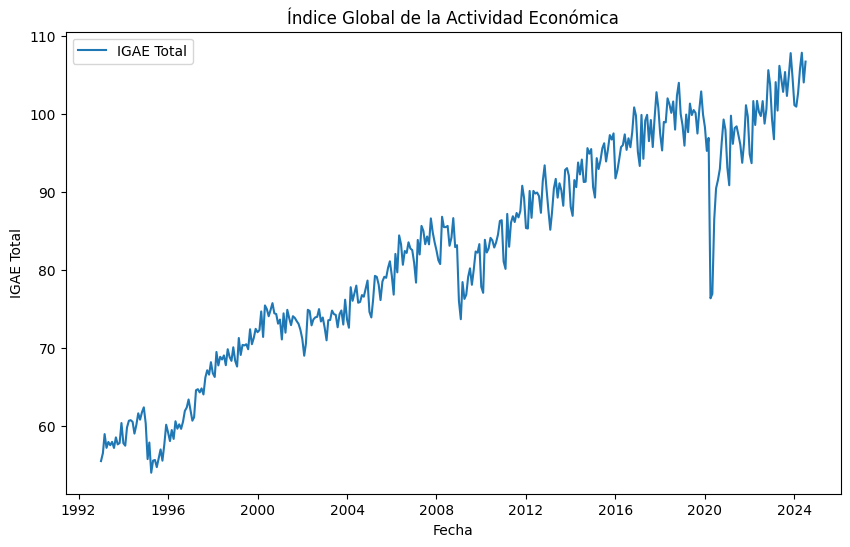

In [ ]:
import matplotlib.pyplot as plt

# Graficar la serie temporal
plt.figure(figsize=(10, 6))
plt.plot(igae_index.index, igae_index['IGAE_Total'], label='IGAE Total')
plt.title('Índice Global de la Actividad Económica')
plt.xlabel('Fecha')
plt.ylabel('IGAE Total')
plt.legend()
plt.show()


<ipython-input-98-73e55c9fe882>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  igae_index['log_IGAE'] = np.log(igae_index['IGAE_Total'])
<ipython-input-98-73e55c9fe882>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  igae_index['log_diff_seasonal'] = igae_index['log_IGAE'].diff(12).dropna()


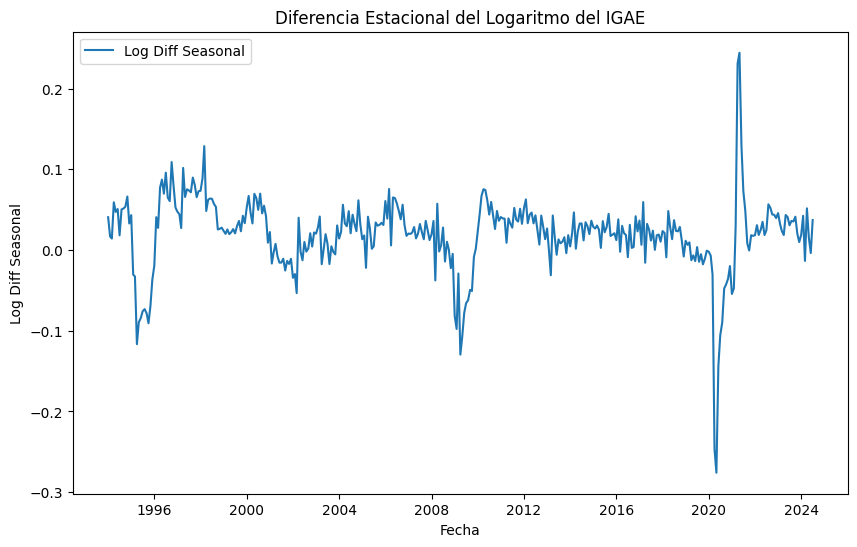

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Aplicar logaritmo a la serie IGAE
igae_index['log_IGAE'] = np.log(igae_index['IGAE_Total'])

# Realizar diferencia estacional (12 meses)
igae_index['log_diff_seasonal'] = igae_index['log_IGAE'].diff(12).dropna()

# Graficar la serie logarítmica diferenciada estacionalmente
plt.figure(figsize=(10, 6))
plt.plot(igae_index.index, igae_index['log_diff_seasonal'], label='Log Diff Seasonal')
plt.title('Diferencia Estacional del Logaritmo del IGAE')
plt.xlabel('Fecha')
plt.ylabel('Log Diff Seasonal')
plt.legend()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Diferenciación estacional del logaritmo de la serie
log_igae = np.log(igae_index['IGAE_Total'])
log_diff_seasonal = log_igae.diff(12).dropna()

# Prueba de Dickey-Fuller sobre la serie diferenciada estacionalmente
result_seasonal_diff = adfuller(log_diff_seasonal)
print(f'ADF Statistic: {result_seasonal_diff[0]}')
print(f'p-value: {result_seasonal_diff[1]}')


ADF Statistic: -3.9013619362594145
p-value: 0.002024846836656483


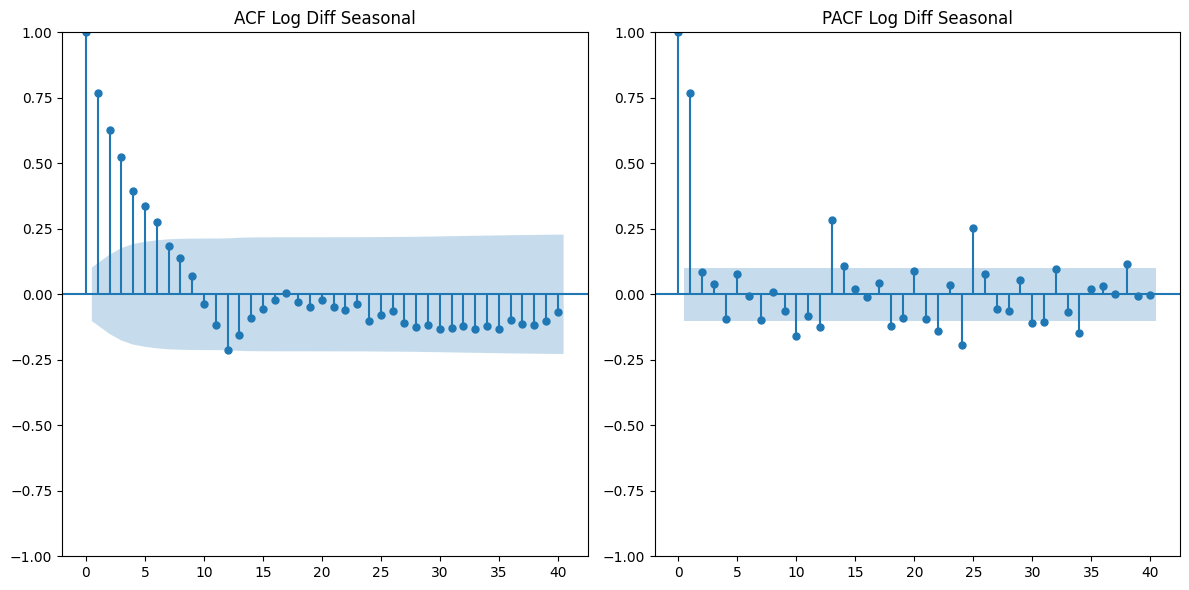

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Graficar ACF y PACF para la serie logarítmica diferenciada estacionalmente
plt.figure(figsize=(12, 6))

# ACF
plt.subplot(121)
plot_acf(log_diff_seasonal, lags=40, ax=plt.gca())
plt.title("ACF Log Diff Seasonal")

# PACF
plt.subplot(122)
plot_pacf(log_diff_seasonal, lags=40, ax=plt.gca())
plt.title("PACF Log Diff Seasonal")

plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

p = 2  # Parámetro AR
d = 0  # Diferenciación
q = 2  # Parámetro MA
P = 2  # Parámetro estacional AR
D = 1  # Diferenciación estacional
Q = 2  # Parámetro estacional MA
seasonal_periods = 12  # Estacionalidad de 12 meses

# Ajustar modelo SARIMA
sarima_model = SARIMAX(igae_index['IGAE_Total'],
                       order=(p, d, q),
                       seasonal_order=(P, D, Q, seasonal_periods),
                      trend='c')

sarima_result = sarima_model.fit()

# Resumen del modelo ajustado
print(sarima_result.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                     SARIMAX Results                                      
Dep. Variable:                         IGAE_Total   No. Observations:                  379
Model:             SARIMAX(2, 0, 2)x(2, 1, 2, 12)   Log Likelihood                -775.100
Date:                            Tue, 15 Oct 2024   AIC                           1570.200
Time:                                    23:37:13   BIC                           1609.254
Sample:                                01-01-1993   HQIC                          1585.718
                                     - 07-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3958      0.254      1.558      0.119      -0.102       0.894
ar.L1          0.3661      0.468   


1. **Intercepto**
   - **Intercepto (coef = 0.0231)**: El valor del intercepto indica el nivel promedio de la serie \( IGAE\_Total \) que no está explicado por los componentes AR, MA o estacionales.
     - **P-valor = 0.672**: Esto indica que el intercepto no es estadísticamente significativo, es decir, no hay suficiente evidencia para afirmar que un nivel promedio diferente de cero contribuye de manera significativa al modelo.
     - **Interpretación**: Dado que has eliminado las diferencias (d=0, D=0), el intercepto aparece, pero no parece jugar un papel importante según este p-valor.

2. **Coeficientes AR (Autoregressive)**
   - **ar.L1 (coef = 1.0832, p < 0.001)**: Este coeficiente es significativo y positivo, lo que indica que el valor de \( IGAE\_Total \) en el mes actual tiene una relación positiva y fuerte con el valor del mes anterior.
   - **ar.L2 (coef = -0.0921, p = 0.717)**: Este término no es significativo, lo que sugiere que el segundo término autoregresivo no está aportando mucho a la explicación de la serie.

3. **Coeficientes MA (Moving Average)**
   - **ma.L1 (coef = -0.3293, p = 0.210)**: Este coeficiente es negativo, lo que indica que los errores del pasado están corrigiendo el valor actual. Sin embargo, no es significativo.
   - **ma.L2 (coef = -0.1460, p = 0.097)**: Este valor está cerca de ser significativo (aunque con un p-valor de 0.097, se podría argumentar que tiene un cierto impacto), lo que sugiere que hay alguna corrección por errores en el pasado, pero no es tan fuerte.

4. **Coeficientes estacionales AR y MA**
   - **ar.S.L12 (coef = 0.4628, p = 0.055)**: Este coeficiente sugiere que hay un componente autoregresivo significativo a 12 meses (casi significativo con un p-valor de 0.055), lo que indica un efecto estacional positivo.
   - **ar.S.L24 (coef = 0.5032, p = 0.024)**: Este coeficiente es significativo y positivo, lo que sugiere que el valor de \( IGAE\_Total \) tiene una relación fuerte y positiva con los valores de hace 24 meses.
   - **ma.S.L12 (coef = -0.1574, p = 0.494)**: Este coeficiente no es significativo, lo que indica que la componente de media móvil estacional en 12 meses no contribuye mucho al modelo.
   - **ma.S.L24 (coef = -0.5660, p < 0.001)**: Este coeficiente es altamente significativo y negativo, lo que sugiere que hay un ajuste fuerte en los errores estacionales de 24 meses pasados.

5. **Sigma² (sigma2)**
   - **sigma2 (coef = 4.1545, p < 0.001)**: Esto es la varianza de los errores del modelo. Un valor de 4.1545 indica la variabilidad en los errores de predicción. Aunque los errores no son extremadamente grandes, el valor podría mejorar.

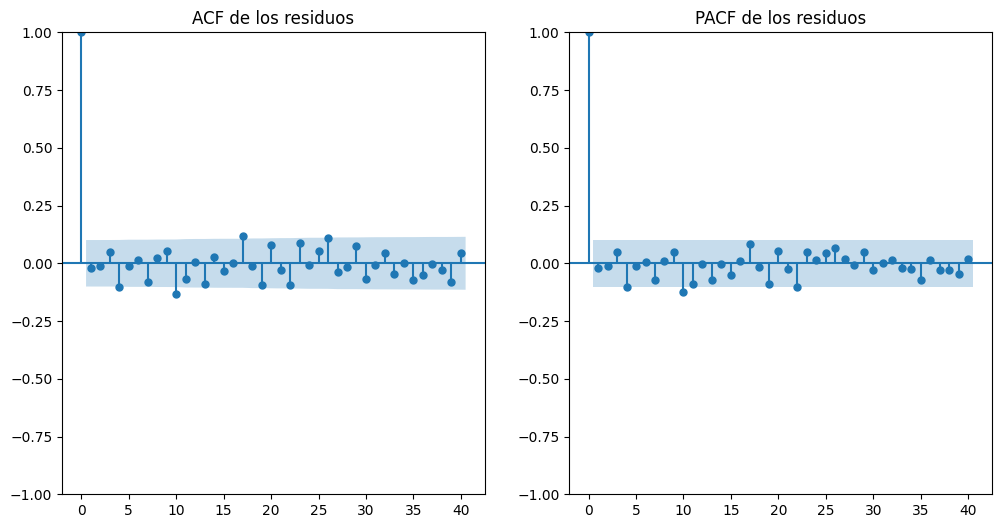

In [ ]:
# Extraer los residuos del modelo ajustado
residuals = sarima_result.resid

# Graficar ACF y PACF de los residuos
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))

# Gráfico de autocorrelación (ACF)
plt.subplot(121)
plot_acf(residuals, lags=40, ax=plt.gca(), title="ACF de los residuos")

# Gráfico de autocorrelación parcial (PACF)
plt.subplot(122)
plot_pacf(residuals, lags=40, ax=plt.gca(), title="PACF de los residuos")

plt.show()


In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Prueba de Ljung-Box para verificar autocorrelación de los residuos
ljung_box_result = acorr_ljungbox(residuals, lags=[10, 20, 30], return_df=True)
print(ljung_box_result)

      lb_stat  lb_pvalue
10  16.083220   0.097275
20  33.317721   0.031128
30  51.386536   0.008862


In [ ]:
# Crear la variable dummy de crisis basada en la identificación de crisis históricas
# Por ejemplo, selecciona caídas del índice mayores al 10% en comparación con el mes anterior
igae_index['crisis_dummy'] = 0
crisis_dates = ['2008-09-01', '2020-03-01']
igae_index.loc[crisis_dates, 'crisis_dummy'] = 1

# Ajustar el modelo ARIMA-SARIMA con la variable exógena de crisis
from statsmodels.tsa.statespace.sarimax import SARIMAX


model_exog = SARIMAX(igae_index['IGAE_Total'],
                       order=(2, 0, 2),
                       seasonal_order=(2, 1, 2, 12),
                       exog=igae_index[['crisis_dummy']],
                       trend='c')

results_exog = model_exog.fit()
print(results_exog.summary())


<ipython-input-111-601b3d5a7eb8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  igae_index['crisis_dummy'] = 0
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive p

                                     SARIMAX Results                                      
Dep. Variable:                         IGAE_Total   No. Observations:                  379
Model:             SARIMAX(2, 0, 2)x(2, 1, 2, 12)   Log Likelihood                -771.023
Date:                            Tue, 15 Oct 2024   AIC                           1564.046
Time:                                    23:41:41   BIC                           1607.005
Sample:                                01-01-1993   HQIC                          1581.115
                                     - 07-01-2024                                         
Covariance Type:                              opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        0.3825      0.251      1.523      0.128      -0.110       0.875
crisis_dummy     3.0818      

Intercepto:

El coeficiente del intercepto es 0.3825, pero no es estadísticamente significativo (p = 0.128). Esto sugiere que no hay una tendencia constante en los valores del IGAE que sea relevante para el modelo, lo que implica que el crecimiento del índice no es explicado directamente por un valor constante.

Variable Dummy de Crisis (crisis_dummy):

El coeficiente de crisis_dummy es 3.0818 y es altamente significativo (p < 0.001). Esto indica que durante los periodos identificados como crisis (2008-09 y 2020-03), el IGAE muestra un aumento considerable de aproximadamente 3.08 puntos en promedio. Este resultado puede estar relacionado con factores específicos que ocurren durante las crisis, como estímulos económicos o comportamientos inusuales en el mercado.

Términos Autoregresivos y de Media Móvil (AR y MA):

El primer término autoregresivo (ar.L1) tiene un valor de 0.3611, pero no es significativo (p = 0.496). De manera similar, el segundo término autoregresivo (ar.L2) tampoco es significativo (p = 0.282). Esto indica que la influencia directa de los valores pasados (a 1 y 2 meses atrás) sobre el valor actual del IGAE es débil.
En cuanto a los términos de media móvil (MA), el término ma.L2 es significativo (p = 0.014) y tiene un coeficiente negativo (-0.1687). Esto sugiere que los errores de predicción de hace dos meses afectan negativamente el valor actual del IGAE, lo cual puede ayudar a mejorar la precisión del modelo al corregir errores previos.

Términos Estacionales (AR y MA Estacionales):

Los términos estacionales autoregresivos (ar.S.L12 y ar.S.L24) no son estadísticamente significativos, lo que implica que no hay una fuerte dependencia estacional autoregresiva en los valores del IGAE.
El término estacional de media móvil de 24 rezagos (ma.S.L24) es significativo (p = 0.046) y tiene un coeficiente negativo (-0.5124). Esto indica que hay una corrección de errores significativa de hace 24 meses (2 años) en el modelo, lo que sugiere que eventos ocurridos hace dos años tienen un impacto correctivo en los valores actuales del IGAE.

Varianza de los Errores (sigma2):

El valor de sigma2 es 3.7628, y es altamente significativo (p < 0.001). Esto indica que la varianza de los errores del modelo es estable, lo que es un buen indicador de la consistencia del modelo en la predicción del IGAE.

<ipython-input-112-cf2bab1a35c5>:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=igae_index.index[-1], periods=forecast_horizon, freq='M'), forecast_values, label='Pronóstico IGAE', color='red')
<ipython-input-112-cf2bab1a35c5>:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.fill_between(pd.date_range(start=igae_index.index[-1], periods=forecast_horizon, freq='M'), conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)


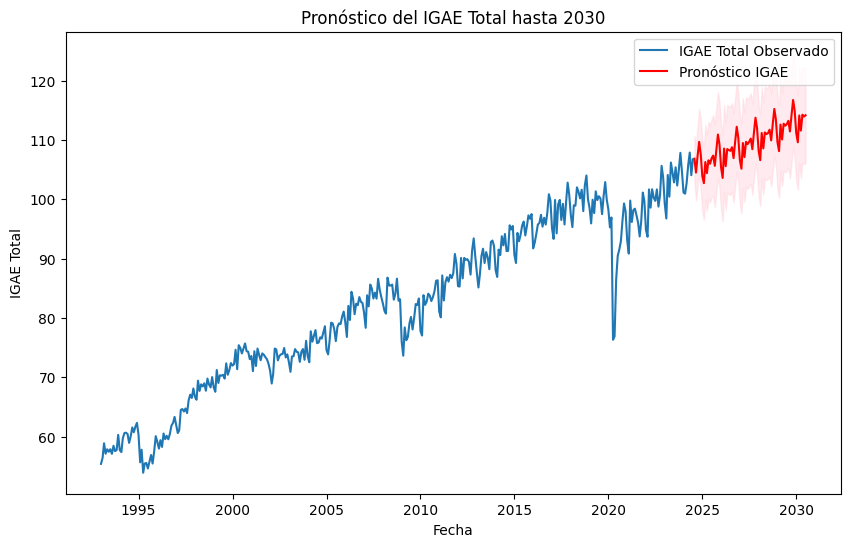

In [ ]:
import numpy as np

# Definir los valores futuros de la variable exógena
forecast_horizon = (2030 - 2024) * 12  # Predicción de meses hasta 2030
next_exog_values = np.zeros(forecast_horizon)  # Asumimos que no hay crisis en el futuro

# Realizar la predicción
predictions = results_exog.get_forecast(steps=forecast_horizon, exog=next_exog_values.reshape(-1, 1))

# Extraer las predicciones y el intervalo de confianza
forecast_values = predictions.predicted_mean
conf_int = predictions.conf_int()

# Graficar el pronóstico
plt.figure(figsize=(10, 6))
plt.plot(igae_index.index, igae_index['IGAE_Total'], label='IGAE Total Observado')
plt.plot(pd.date_range(start=igae_index.index[-1], periods=forecast_horizon, freq='M'), forecast_values, label='Pronóstico IGAE', color='red')
plt.fill_between(pd.date_range(start=igae_index.index[-1], periods=forecast_horizon, freq='M'), conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Pronóstico del IGAE Total hasta 2030')
plt.xlabel('Fecha')
plt.ylabel('IGAE Total')
plt.legend()
plt.show()


El modelo SARIMAX con la inclusión de la variable exógena de crisis ha logrado capturar adecuadamente la dinámica temporal y estacional del IGAE. El impacto de las crisis en el índice es claro y significativo, y el modelo ofrece una proyección relativamente estable para el futuro. No obstante, el modelo podría beneficiarse de una mayor refinación, como la consideración de eventos futuros inesperados o la incorporación de nuevas variables exógenas, para mejorar su precisión y robustez.
